# Contexte


Dans ce contexte, nous avons décidé de mener une étude visant à approfondir notre compréhension de la réactivité des clients face à des campagnes, en tenant compte de leurs caractéristiques spécifiques. Une telle analyse approfondie de la clientèle revêt une importance cruciale, car elle permettra la conception de plans marketing plus précis, ciblés et susceptibles d'optimiser le nombre de conversions générées par des campagnes.

Au-delà de cette compréhension initiale, notre objectif est d'établir ultérieurement un modèle de classification. En se basant sur les caractéristiques individuelles des clients, ce modèle nous permettra de prédire avec précision leur propension à être intéressés par l'offre présentée dans des campagnes publicitaires. Cette approche offre à une entreprise un avantage significatif en termes de gain de temps, en nous permettant de cibler de manière plus efficace les personnes susceptibles de convertir. Ils pourront ainsi adapter leur campagnes de manière optimale pour correspondre aux attentes de ceux qui n'ont pas encore manifesté d'intérêt face à leur offre initiale.

## Interets de l'etude

Actuellement, les algorithmes de classification sont largement utilisés dans l'optimisation du marketing. Ils répondent efficacement aux besoins de compréhension de la clientèle et permettent d'anticiper leurs réactions au fil du temps. Cette approche offre aux entreprises une base solide pour améliorer leur retour sur investissement et générer des taux de conversion plus significatifs pour leurs offres de produits ou services.

## Chargement des bibliotheques

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Analyse exploratoire des données

In [4]:
Data_Campagne = pd.read_csv("data/marketing_campaign.csv", delimiter=";")
Data_Campagne.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Nous utilisons cette valeur ici comme servant de variable cible pour notre étude. Nous allons donc commencer par une analyse exploratoire des données pour comprendre la distribution de cette variable et son impact sur les autres variables du jeu de données. 

Cout_Contact : Coût associé au contact avec le client (valeur à vérifier)

In [5]:
Data_Campagne["Z_CostContact"].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

Cette varaible est une variable continue. Nous allons donc commencer par une analyse exploratoire des données pour comprendre la distribution de cette variable et son impact sur les autres variables du jeu de données.

In [6]:
# Affichage de la taille du Data_Campagne_cleanFrame
nombre_lignes = Data_Campagne.shape[0]
nombre_colonnes = Data_Campagne.shape[1]
print(f"La base de données contient {nombre_lignes} lignes et {nombre_colonnes} colonnes.")

La base de données contient 2240 lignes et 29 colonnes.


## Examen de la Structure des Données

In [7]:
structure_info = Data_Campagne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Vérification Visuelle des Valeurs Manquantes

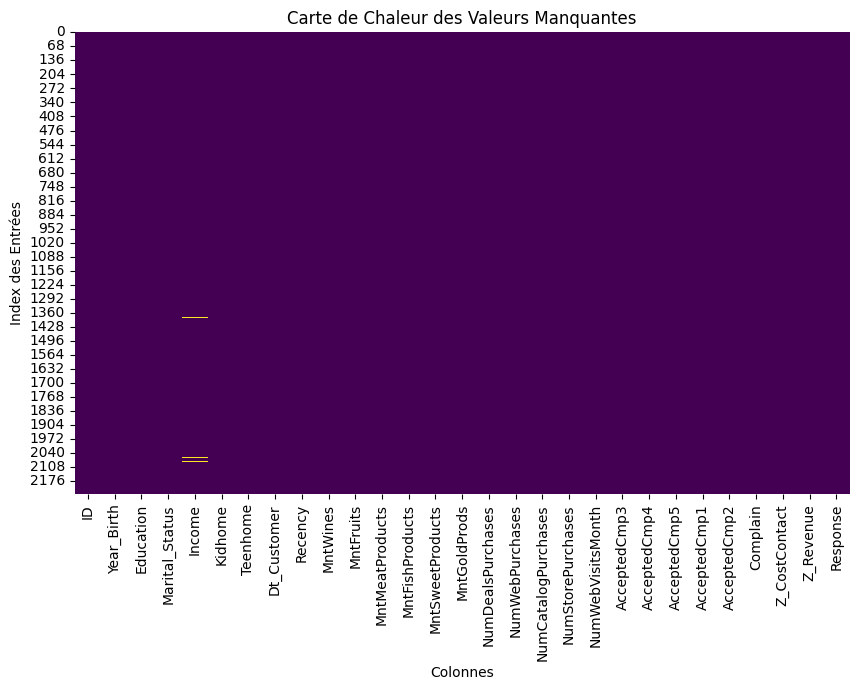

In [8]:
# Vérification visuelle des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(Data_Campagne.isnull(), cbar=False, cmap='viridis')
plt.title('Carte de Chaleur des Valeurs Manquantes')
plt.xlabel('Colonnes')
plt.ylabel('Index des Entrées')
plt.show()

le revenu annuel presente des valeurs manquantes. Nous allons donc proceder a une imputation de ces valeurs manquantes.

In [9]:
nombre_valeurs_manquantes_income = Data_Campagne['Income'].isnull().sum()
print(f'Le nombre de valeur manquante dans la colonne Income est de {nombre_valeurs_manquantes_income}')

Le nombre de valeur manquante dans la colonne Income est de 24


Il s'avère qu'une seule colonne, Income, contient des valeurs manquantes dans notre base de données Data_Campagne. Le nombre total de ces valeurs manquantes est de 24. Il est important de connaître ce chiffre pour envisager une méthode d'imputation appropriée dans les étapes suivantes de notre analyse. Cette étape est essentielle pour garantir l'intégrité et la qualité de nos données avant de procéder à des analyses plus poussées.

## Renommage des Colonnes

In [10]:
# Renommage des colonnes
nouveaux_noms = {
    'ID': 'Identifiant',
    'Year_Birth': 'Annee_Naissance',
    'Education': 'Niveau_Education',
    'Marital_Status': 'Statut_Marital',
    'Income': 'Revenu',
    'Kidhome': 'Nb_Enfants',
    'Teenhome': 'Nb_Adolescents',
    'Dt_Customer': 'Date_Inscription',
    'Recency': 'Recence_Achat',
    'MntWines': 'Depenses_Vins',
    'MntFruits': 'Depenses_Fruits',
    'MntMeatProducts': 'Depenses_Viandes',
    'MntFishProducts': 'Depenses_Poissons',
    'MntSweetProducts': 'Depenses_Sucreries',
    'MntGoldProds': 'Depenses_Or',
    'NumDealsPurchases': 'Achats_Promos',
    'NumWebPurchases': 'Achats_Web',
    'NumCatalogPurchases': 'Achats_Catalogue',
    'NumStorePurchases': 'Achats_Magasin',
    'NumWebVisitsMonth': 'VisitesWeb_Mois',
    'AcceptedCmp3': 'Campagne3_Acceptee',
    'AcceptedCmp4': 'Campagne4_Acceptee',
    'AcceptedCmp5': 'Campagne5_Acceptee',
    'AcceptedCmp1': 'Campagne1_Acceptee',
    'AcceptedCmp2': 'Campagne2_Acceptee',
    'Complain': 'Plainte',
    'Z_CostContact': 'Cout_Contact', # à vérifier
    'Z_Revenue': 'Revenu_Z', # à vérifier
    'Response': 'Reponse'}

In [11]:
Data_Campagne.rename(columns=nouveaux_noms, inplace=True)

# Affichage des nouveaux noms de colonnes
Data_Campagne.columns

Index(['Identifiant', 'Annee_Naissance', 'Niveau_Education', 'Statut_Marital',
       'Revenu', 'Nb_Enfants', 'Nb_Adolescents', 'Date_Inscription',
       'Recence_Achat', 'Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes',
       'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or',
       'Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin',
       'VisitesWeb_Mois', 'Campagne3_Acceptee', 'Campagne4_Acceptee',
       'Campagne5_Acceptee', 'Campagne1_Acceptee', 'Campagne2_Acceptee',
       'Plainte', 'Cout_Contact', 'Revenu_Z', 'Reponse'],
      dtype='object')

## Visualisation des Variables - Analyses Univariée et Bivariée

Dans cette partie, nous allons explorer visuellement nos données. L'analyse univariée nous permet de comprendre chaque variable individuellement, tandis que l'analyse bivariée met en lumière les relations et corrélations entre deux variables. Ces visualisations nous aideront à saisir les tendances, les anomalies et les motifs dans notre jeu de données.

Nous utiliserons des graphiques clairs et informatifs, avec des légendes et des annotations pour faciliter la compréhension des résultats.

### Niveau de vie 

Nous alons visualiser les varaibles suivantes 'Niveau_Education', 'Statut_Marital', 'Nb_Enfants', 'Nb_Adolescents'

C:\Users\user\AppData\Local\Temp\ipykernel_17248\343629320.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=Data_Campagne, palette="viridis", ax=ax)
C:\Users\user\AppData\Local\Temp\ipykernel_17248\343629320.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=Data_Campagne, palette="viridis", ax=ax)
C:\Users\user\AppData\Local\Temp\ipykernel_17248\343629320.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=Data_Campagne, palette="viridis", ax=ax)
C:\Users\user\AppData\Local\Temp\ipykernel_172

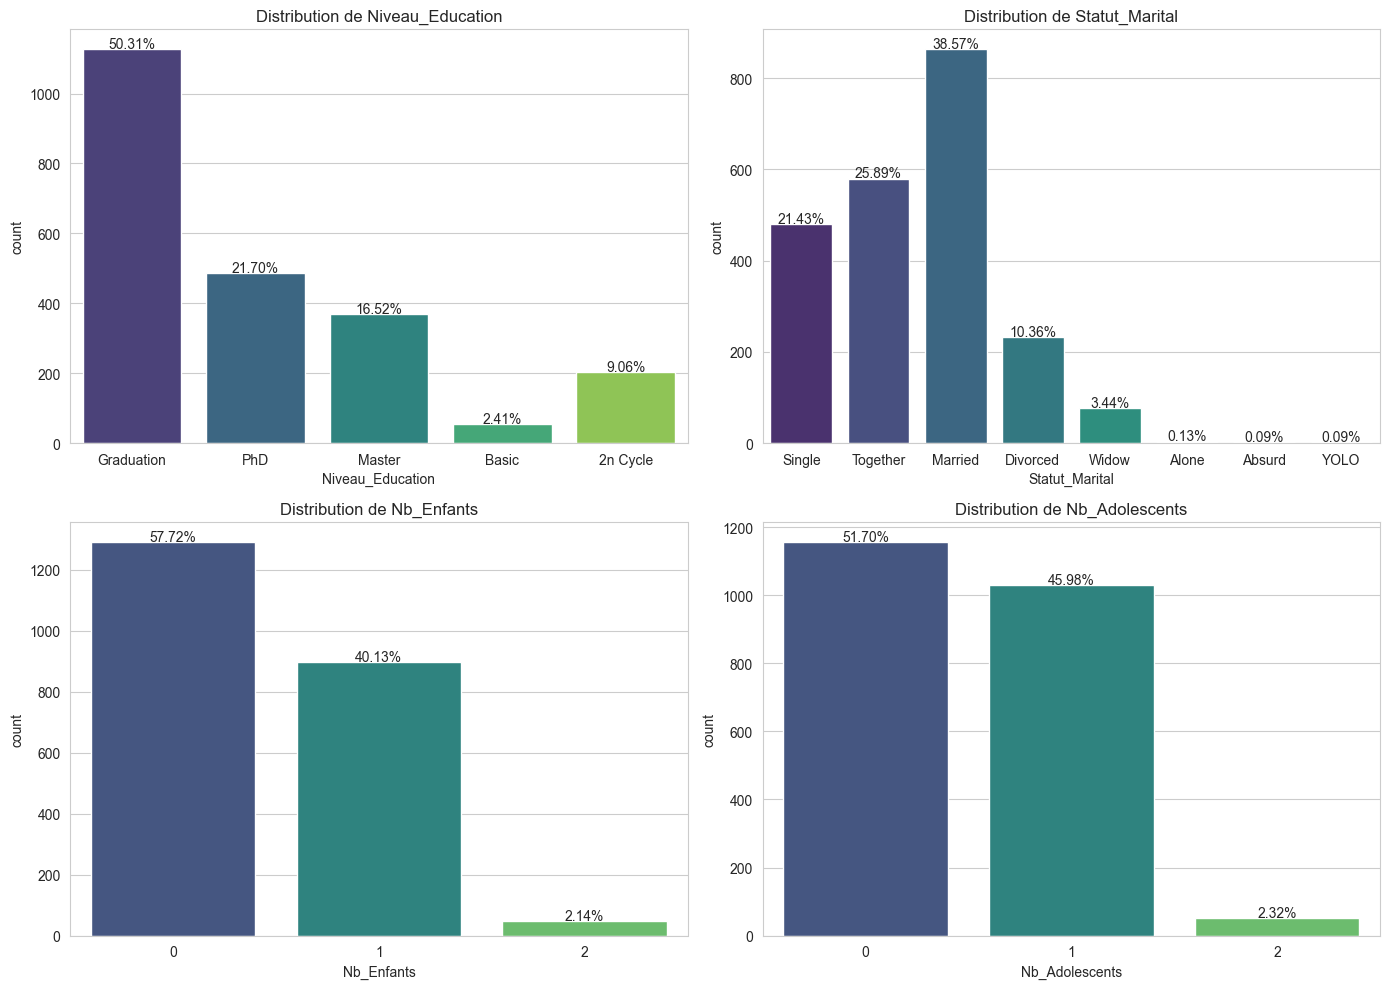

In [12]:
# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création d'une figure avec 4 sous-graphiques
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Liste des colonnes à visualiser
    colonnes = ['Niveau_Education', 'Statut_Marital', 'Nb_Enfants', 'Nb_Adolescents']

    # Parcours des colonnes et création des histogrammes
    for i, col in enumerate(colonnes):
        ax = axes[i//2, i%2]
        total = float(len(Data_Campagne[col]))
        sns.countplot(x=col, data=Data_Campagne, palette="viridis", ax=ax)
        ax.set_title(f'Distribution de {col}')

        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(100 * height/total),
                    ha="center")

    # Ajustement de l'espace entre les graphiques
    plt.tight_layout()
    plt.show()

### Comportements d'Achat et Visites Web

C:\Users\user\AppData\Local\Temp\ipykernel_17248\1040879524.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=var, data=Data_Campagne, ax=ax, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_17248\1040879524.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=var, data=Data_Campagne, ax=ax, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_17248\1040879524.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=var, data=Data_Campagne, ax=ax, palette='viridis')
C:\User

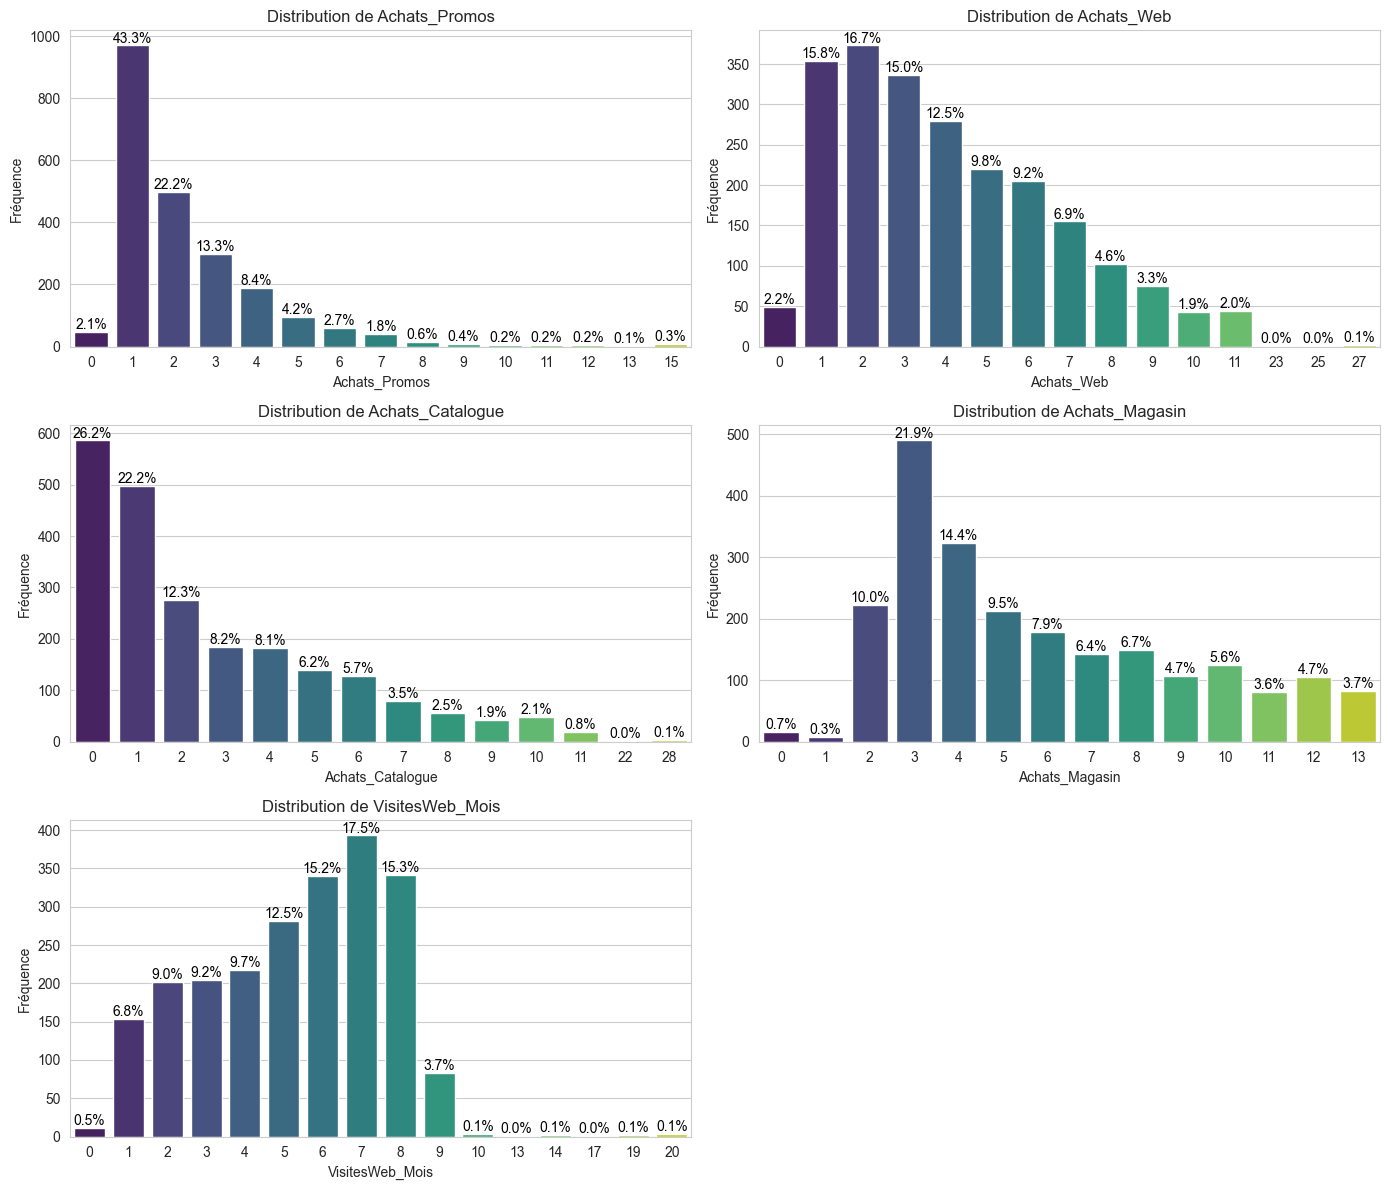

In [13]:
# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Les noms de variables en français
    variables = ['Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']

    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile

    # Parcours des variables pour créer des histogrammes
    for ax, var in zip(axes, variables):
        total = Data_Campagne[var].notnull().sum()  # Total pour le calcul des pourcentages
        countplot = sns.countplot(x=var, data=Data_Campagne, ax=ax, palette='viridis')
        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Fréquence')
        
        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    # Suppression du dernier axe
    fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

### Dépenses des Clients

C:\Users\user\AppData\Local\Temp\ipykernel_17248\2010511068.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=var, data=Data_Campagne, ax=ax, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_17248\2010511068.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=var, data=Data_Campagne, ax=ax, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_17248\2010511068.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=var, data=Data_Campagne, ax=ax, palette='viridis')
C:\User

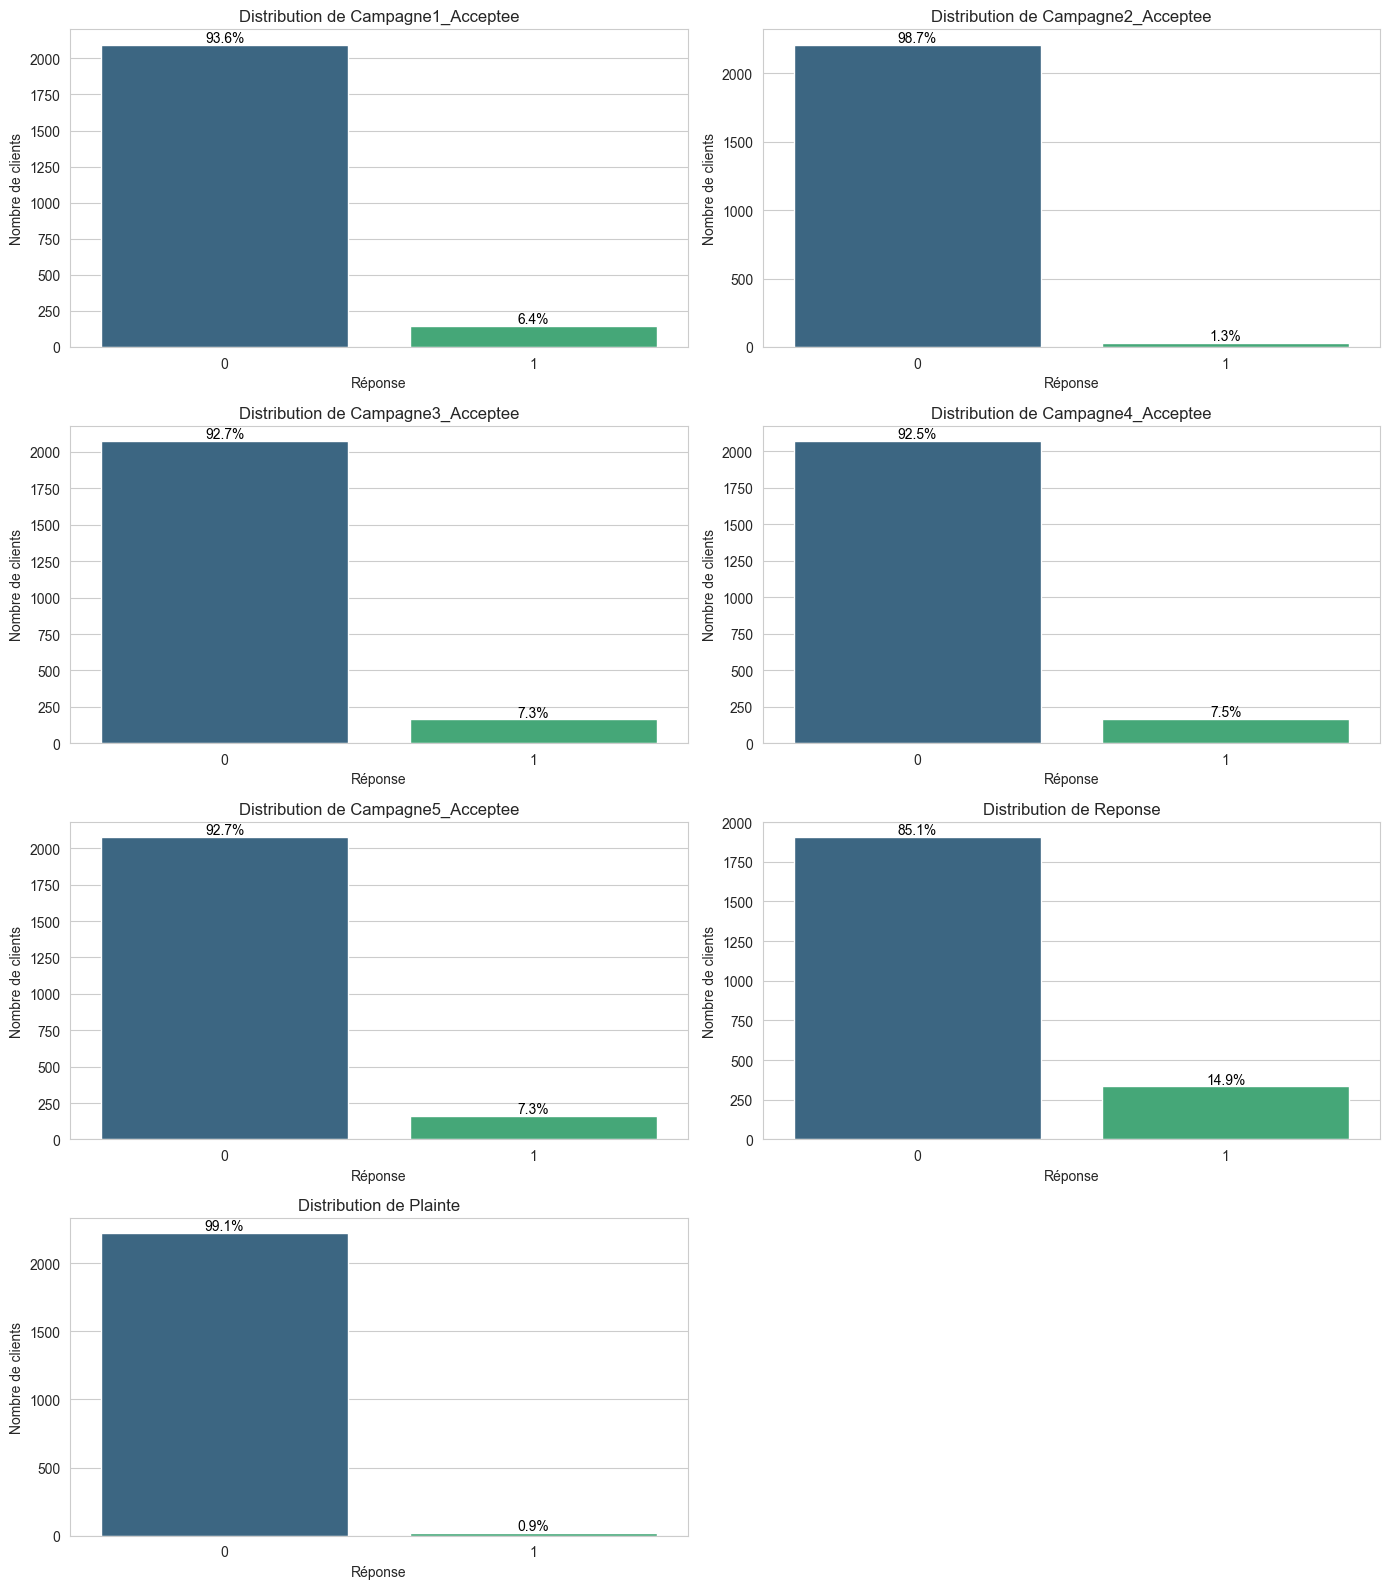

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que la base de données soit correctement chargée dans Data_Campagne
# Data_Campagne = pd.read_csv('chemin/vers/le/fichier.csv') # Remplacer par le chemin réel

# Définition des variables relatives aux campagnes acceptées et la cible (Réponse)
campagnes_variables = ['Campagne1_Acceptee', 'Campagne2_Acceptee', 'Campagne3_Acceptee', 
                       'Campagne4_Acceptee', 'Campagne5_Acceptee', 'Reponse', 'Plainte']
# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(4, 2, figsize=(14, 16))

    # Aplatir le tableau des axes pour un accès facile
    axes = axes.flatten()

    # Parcours des variables pour créer des histogrammes
    for i, var in enumerate(campagnes_variables):
        ax = axes[i]
        total = Data_Campagne[var].notnull().sum()  # Total pour le calcul des pourcentages
        countplot = sns.countplot(x=var, data=Data_Campagne, ax=ax, palette='viridis')
        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel('Réponse')
        ax.set_ylabel('Nombre de clients')

        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
# Suppression des axes inutilisés si nécessaire
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


### Réponses aux Campagnes Marketing et Plaintes

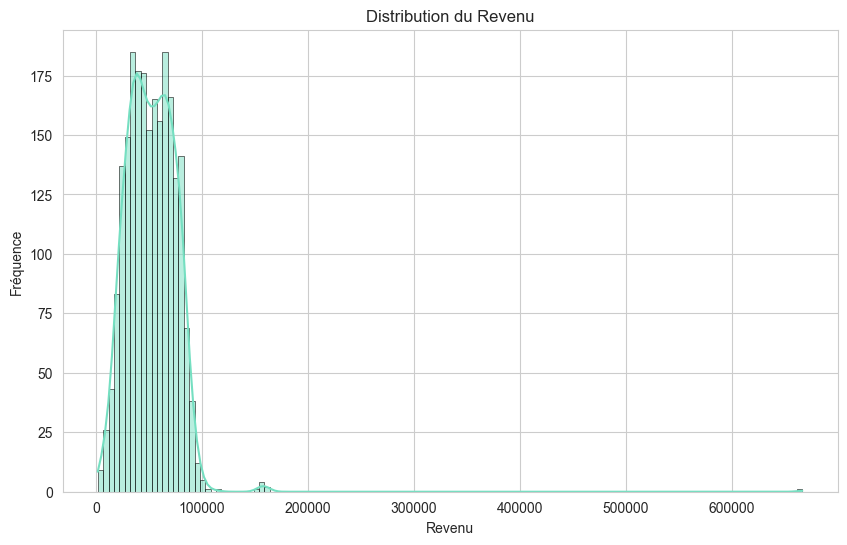

,count,mean,std,min,25%,50%,75%,max
Revenu,2216.0,52247.25,25173.08,1730.0,35303.0,51381.5,68522.0,666666.0


In [15]:
# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création d'un histogramme pour la variable 'Revenu'
    plt.figure(figsize=(10, 6))
    sns.histplot(Data_Campagne['Revenu'], kde=True, color='#75DFC1', edgecolor='black')
    plt.title('Distribution du Revenu')
    plt.xlabel('Revenu')
    plt.ylabel('Fréquence')
    plt.show()
# Calcul des statistiques descriptives pour 'Revenu'
stats_desc_revenu = Data_Campagne["Revenu"].describe().round(2)

# Convertir en DataFrame pour pouvoir transposer
stats_desc_revenu_df = pd.DataFrame(stats_desc_revenu)

# Transposition du tableau pour une meilleure présentation
stats_desc_revenu_transposed = stats_desc_revenu_df.T

# Affichage du tableau transposé
display(stats_desc_revenu_transposed)

## Traitement de la Base de Données

# ***Discrétisation des Variables Continues et Calcul de l'Âge et de l'Ancienneté***
Nous discrétiserons les variables 'Revenu' et les différentes catégories de dépenses ('Vins', 'Fruits', 'Viandes', 'Poissons', 'Sucreries', 'Or') en se basant sur leurs statistiques descriptives. De plus, nous calculerons l'âge des clients à partir de leur année de naissance, en considérant 2019 comme l'année de référence, et l'ancienneté à partir de leur date d'inscription.

Regroupement des Modalités
Pour les variables telles que 'Statut Marital', 'Achats Promos', 'Achats Web', 'Achats Catalogue', 'Achats Magasin', 'Visites Web par Mois', et les réponses aux campagnes, nous regrouperons les modalités ayant moins de valeurs pour simplifier l'analyse et améliorer la performance des modèles.

Ces étapes de traitement sont vitales pour assurer la qualité des données et leur pertinence pour l'analyse. Un prétraitement méticuleux permet d'obtenir des résultats d'analyse plus fiables et des modèles prédictifs plus précis.

La distribution des revenus présente une large gamme, avec une moyenne de 52,247.25 € et une médiane de 51,381.50 €. Cette différence suggère une distribution asymétrique, probablement influencée par des valeurs extrêmes. Dans de telles situations, la médiane est souvent préférée à la moyenne pour l'imputation car elle est moins sensible à ces valeurs extrêmes.

En imputant les valeurs manquantes par la médiane, nous nous assurons que notre traitement des données reflète de manière plus fidèle la tendance centrale des revenus de nos clients, sans être faussé par les valeurs aberrantes. Cette approche contribue à maintenir l'intégrité des analyses subséquentes et des modèles prédictifs que nous développerons.

In [16]:
# Calcul de la médiane pour la colonne 'Revenu'
revenu_median = Data_Campagne['Revenu'].median()

# Imputation des valeurs manquantes par la médiane
Data_Campagne['Revenu'].fillna(revenu_median, inplace=True)

# Calcul des statistiques descriptives pour 'Revenu'
stats_desc_revenu = Data_Campagne["Revenu"].describe().round(2)

# Convertir en DataFrame pour pouvoir transposer
stats_desc_revenu_df = pd.DataFrame(stats_desc_revenu)

# Transposition du tableau pour une meilleure présentation
stats_desc_revenu_transposed = stats_desc_revenu_df.T

# Affichage du tableau transposé
display(stats_desc_revenu_transposed)

C:\Users\user\AppData\Local\Temp\ipykernel_17248\1547223047.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_Campagne['Revenu'].fillna(revenu_median, inplace=True)


,count,mean,std,min,25%,50%,75%,max
Revenu,2240.0,52237.98,25037.96,1730.0,35538.75,51381.5,68289.75,666666.0


## Discrétisation de la Variable 'Revenu'

Bas Revenu : Revenus inférieurs au premier quartile (moins de 35,303 €).
Revenu Moyen-Bas : Revenus entre le premier quartile et la médiane (35,303 € à 51,381.5 €).
Revenu Moyen-Haut : Revenus entre la médiane et le troisième quartile (51,381.5 € à 68,522 €).
Haut Revenu : Revenus supérieurs au troisième quartile (plus de 68,522 €).

Cette méthode de discrétisation nous permet de transformer les données continues du revenu en catégories plus maniables, facilitant la compréhension des tendances et des patterns au sein de notre clientèle.

C:\Users\user\AppData\Local\Temp\ipykernel_17248\443430815.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Categorie_Revenu', data=Data_Campagne, palette='viridis')


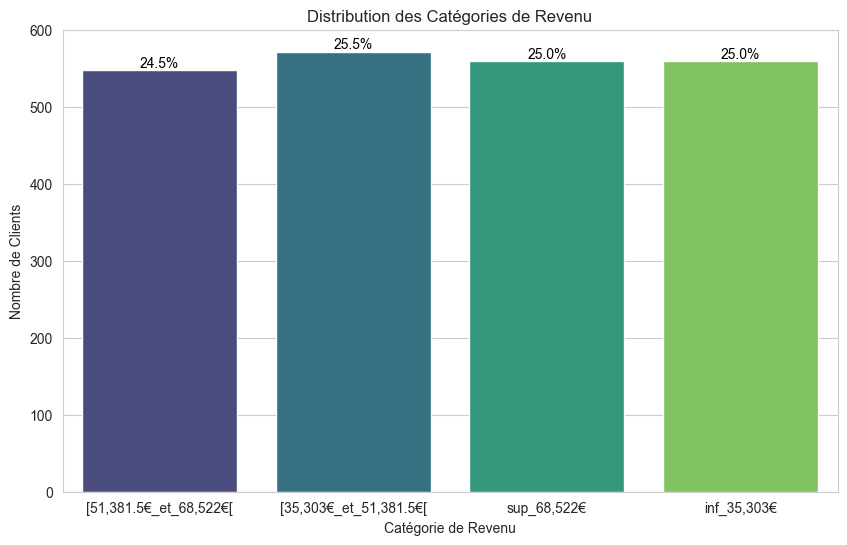

In [17]:
# Détermination des quartiles
quartile1 = Data_Campagne['Revenu'].quantile(0.25)
quartile2 = Data_Campagne['Revenu'].quantile(0.5)  # Médiane
quartile3 = Data_Campagne['Revenu'].quantile(0.75)

# Fonction pour catégoriser chaque revenu en classes nominales
def categorize_revenue(revenue):
    if revenue <= quartile1:
        return 'inf_35,303€'  # Revenus inférieurs au premier quartile
    elif quartile1 < revenue <= quartile2:
        return '[35,303€_et_51,381.5€['  # Revenus entre le premier quartile et la médiane
    elif quartile2 < revenue <= quartile3:
        return '[51,381.5€_et_68,522€['  # Revenus entre la médiane et le troisième quartile
    else:
        return 'sup_68,522€'  # Revenus supérieurs au troisième quartile

# Application de la fonction de catégorisation au DataFrame
Data_Campagne['Categorie_Revenu'] = Data_Campagne['Revenu'].apply(categorize_revenue)

#Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='Categorie_Revenu', data=Data_Campagne, palette='viridis')
    ax.set_title('Distribution des Catégories de Revenu')
    ax.set_xlabel('Catégorie de Revenu')
    ax.set_ylabel('Nombre de Clients')

    # Calcul et affichage des pourcentages sur les barres
    total = len(Data_Campagne['Categorie_Revenu'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.show()

### Discrétisation des Dépenses des Clients

Nous utiliserons les quartiles (25%, 50%, 75%) pour diviser chaque variable de dépense en quatre catégories: 'Faible', 'Modéré', 'Élevé', et 'Très Élevé'.
Cette approche permet de segmenter les dépenses en fonction de leur distribution, en identifiant les clients selon leur niveau de dépense dans chaque catégorie.

In [18]:
# Liste des colonnes de dépenses
depense_cols = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes', 'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or']

# Création d'un DataFrame pour stocker les statistiques descriptives transposées
stats_desc_all = pd.DataFrame()

# Calcul et affichage des statistiques descriptives pour chaque colonne de dépense
for col in depense_cols:
    stats_desc = Data_Campagne[col].describe().round(2)
    stats_desc_df = pd.DataFrame(stats_desc)
    stats_desc_transposed = stats_desc_df.T
    stats_desc_all = pd.concat([stats_desc_all, stats_desc_transposed])

    # Affichage du tableau regroupant toutes les statistiques descriptives transposées
display(stats_desc_all)

,count,mean,std,min,25%,50%,75%,max
Depenses_Vins,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
Depenses_Fruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
Depenses_Viandes,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
Depenses_Poissons,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0
Depenses_Sucreries,2240.0,27.06,41.28,0.0,1.00,8.0,33.00,263.0
Depenses_Or,2240.0,44.02,52.17,0.0,9.00,24.0,56.00,362.0


C:\Users\user\AppData\Local\Temp\ipykernel_17248\3037693283.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=Data_Campagne, ax=ax, palette='viridis', order=order)
C:\Users\user\AppData\Local\Temp\ipykernel_17248\3037693283.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=Data_Campagne, ax=ax, palette='viridis', order=order)
C:\Users\user\AppData\Local\Temp\ipykernel_17248\3037693283.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=Data_Campagne, ax=ax, 

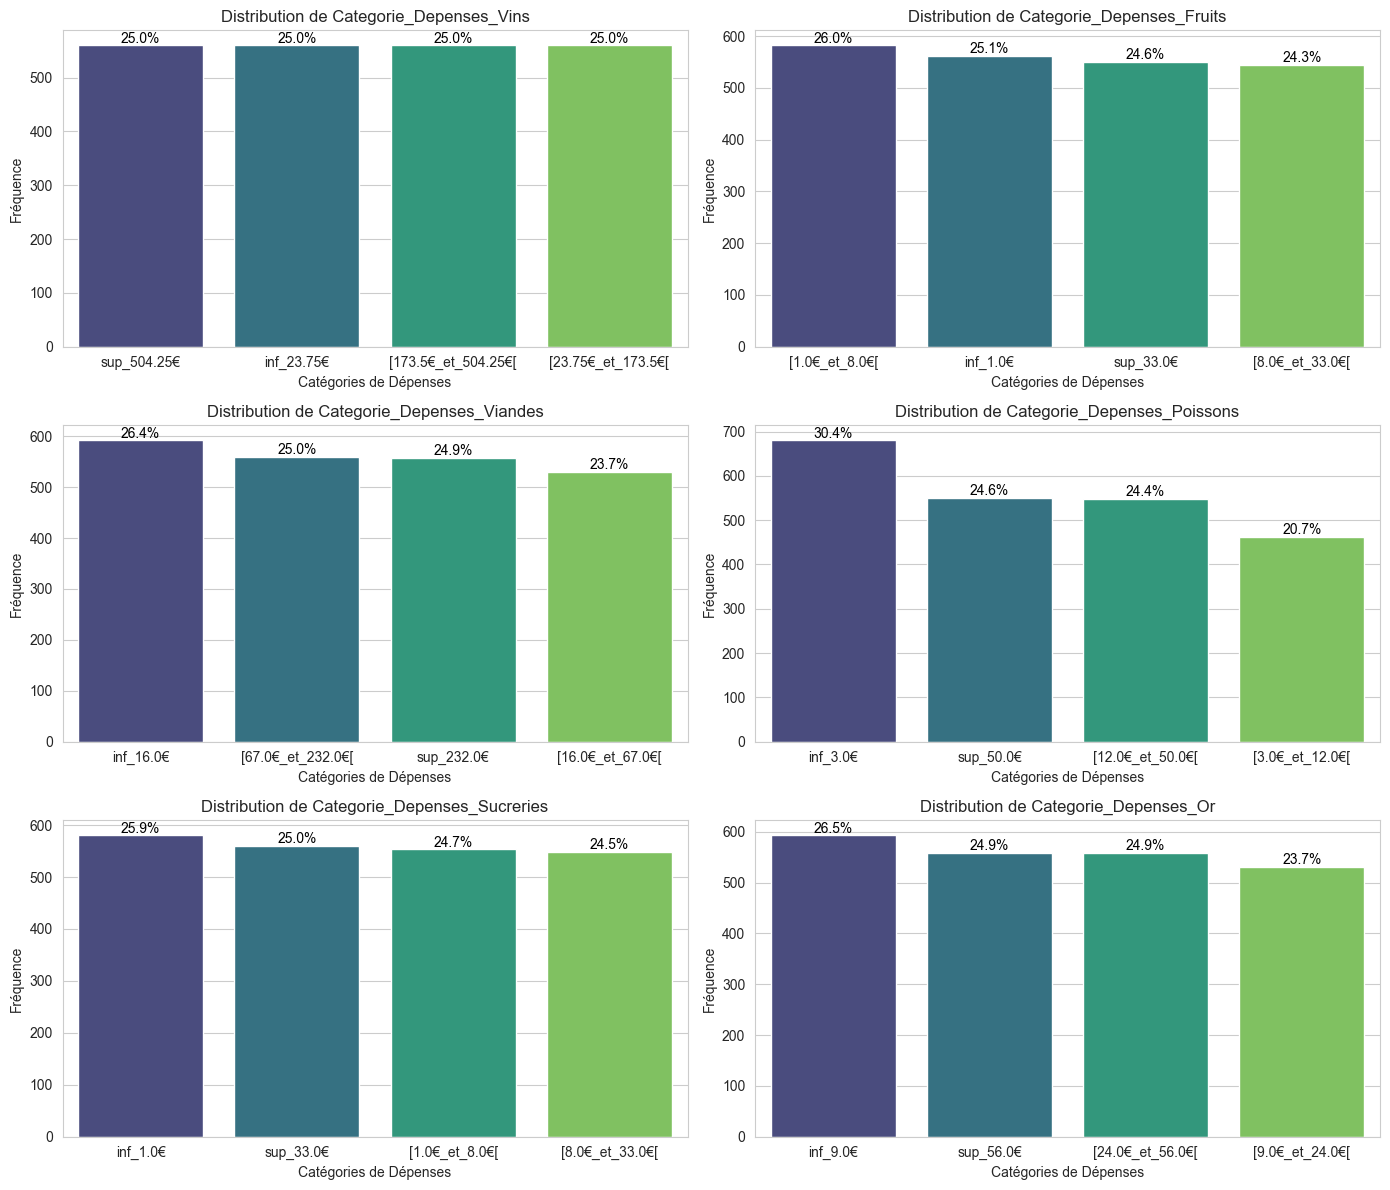

In [19]:
def categorize_expenses(value, quartiles):
    if value <= quartiles[0.25]:
        return f"inf_{quartiles[0.25]}€"
    elif value <= quartiles[0.50]:
        return f"[{quartiles[0.25]}€_et_{quartiles[0.50]}€["
    elif value <= quartiles[0.75]:
        return f"[{quartiles[0.50]}€_et_{quartiles[0.75]}€["
    else:
        return f"sup_{quartiles[0.75]}€"
    
    # Application de la discrétisation pour chaque variable de dépense
depense_cols = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes', 'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or']
for col in depense_cols:
    quartiles = Data_Campagne[col].quantile([0.25, 0.50, 0.75])
    Data_Campagne[f'Categorie_{col}'] = Data_Campagne[col].apply(lambda x: categorize_expenses(x, quartiles))

    # Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile

    # Liste des colonnes de dépenses discrétisées à visualiser
    depense_cols = ['Categorie_Depenses_Vins', 'Categorie_Depenses_Fruits', 'Categorie_Depenses_Viandes', 
                    'Categorie_Depenses_Poissons', 'Categorie_Depenses_Sucreries', 'Categorie_Depenses_Or']
    
    # Parcours des colonnes pour créer des histogrammes
    for ax, col in zip(axes, depense_cols):
        total = len(Data_Campagne[col])  # Total pour le calcul des pourcentages
        order = Data_Campagne[col].value_counts().index  # Ordre basé sur la fréquence
        countplot = sns.countplot(x=col, data=Data_Campagne, ax=ax, palette='viridis', order=order)
        ax.set_title(f'Distribution de {col}')
        ax.set_xlabel('Catégories de Dépenses')
        ax.set_ylabel('Fréquence')

        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

### Transformation des Variables Catégorielles via le Codage à Chaud (One-Hot Encoding)

Pour préparer les données pour la modélisation, une étape cruciale a été la transformation des variables qualitatives (catégorielles) en utilisant la technique de codage à chaud. Cette méthode consiste à créer des colonnes supplémentaires indiquant la présence (ou l'absence) de chaque catégorie possible dans les données originales.

Voici les étapes clés du processus :

Identification des Variables Qualitatives : Toutes les colonnes de type 'object' ont été sélectionnées pour le codage, car elles représentent des données catégorielles.
Application du Codage à Chaud : Chaque catégorie unique d'une variable catégorielle a été convertie en une nouvelle colonne binaire (0 ou 1) dans le jeu de données.
Résultat Final : Le jeu de données transformé contient maintenant des colonnes supplémentaires, chacune correspondant à une catégorie spécifique des variables originales. Par exemple, pour une variable avec trois catégories, trois nouvelles colonnes sont créées.
Cette transformation est essentielle pour permettre aux modèles de machine learning de traiter efficacement les données catégorielles, et elle a été réalisée en utilisant la bibliothèque scikit-learn de Python.

L'utilisation de cette technique assure que chaque catégorie est représentée comme une entité distincte dans le modèle, permettant ainsi une analyse plus précise et nuancée des données

Calcul de l'Âge et de l'Ancienneté des Clients

Pour mieux comprendre notre clientèle, nous avons calculé l'âge et l'ancienneté de nos clients. L'âge a été déduit à partir de l'année de naissance, en considérant 2019 comme l'année actuelle. L'ancienneté a été calculée à partir de la date d'inscription, en prenant également 2019 comme référence.

Inférieur à 42 ans : Regroupe les jeunes adultes.
Entre 42 et 49 ans : Catégorise les adultes moyens.
Entre 49 et 60 ans : Correspond aux adultes supérieurs.
Supérieur à 60 ans : Englobe les seniors.

Cette approche de discrétisation nous aide à mieux cerner les différents groupes d'âge au sein de notre clientèle, facilitant ainsi l'analyse démographique et la segmentation pour des stratégies marketing ciblées.

C:\Users\user\AppData\Local\Temp\ipykernel_17248\646027554.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='Categorie_Age', data=Data_Campagne, palette='viridis', ax=axes[0])
C:\Users\user\AppData\Local\Temp\ipykernel_17248\646027554.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x='Anciennete', data=Data_Campagne, palette='viridis', ax=axes[1])


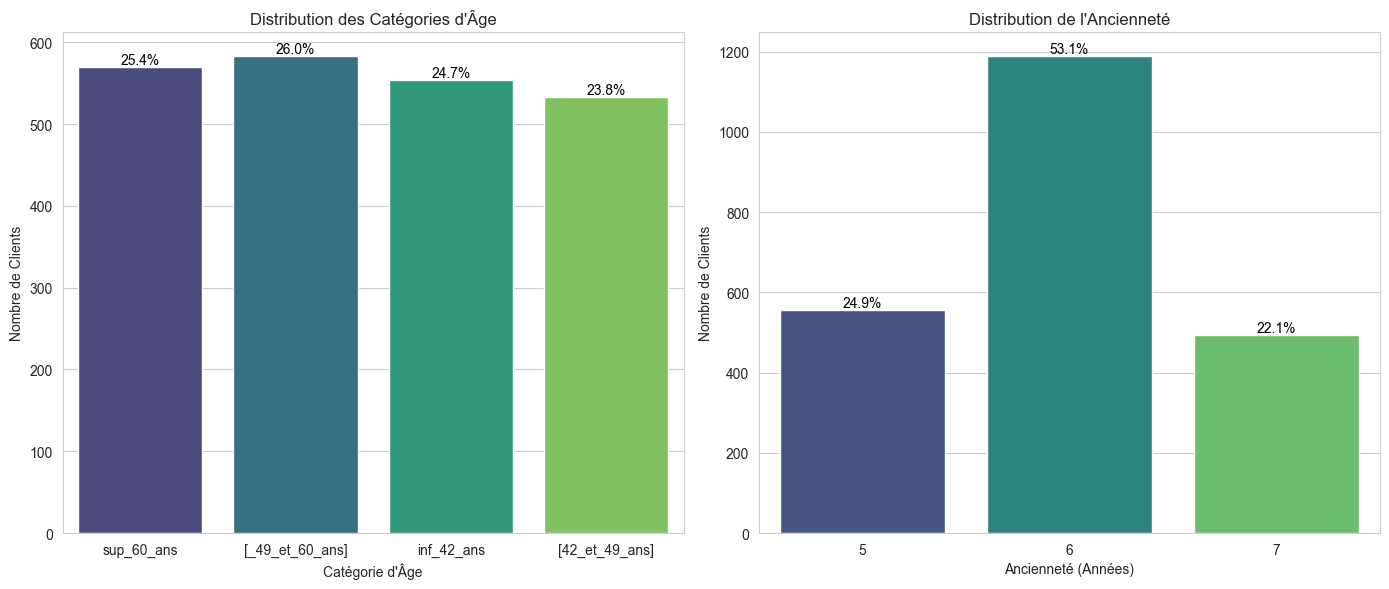

In [20]:
# Calcul de l'âge en 2019 (parce que les  données ont été mis sur le site depuis 2019 )
Data_Campagne['Age'] = 2019 - Data_Campagne['Annee_Naissance']

# Conversion de 'Date_Inscription' en type datetime
Data_Campagne['Date_Inscription'] = pd.to_datetime(Data_Campagne['Date_Inscription'])

# Calcul de l'ancienneté en 2019
Data_Campagne['Anciennete'] = 2019 - Data_Campagne['Date_Inscription'].dt.year


# Fonction pour catégoriser l'âge en fonction des quartiles
def categorize_age(age):
    if age < 42:
        return 'inf_42_ans'  # Jeunes Adultes
    elif 42 <= age < 49:
        return '[42_et_49_ans]'  # Adultes Moyens
    elif 49 <= age < 60:
        return '[_49_et_60_ans]'  # Adultes Supérieurs
    else:
        return 'sup_60_ans'  # Seniors

# Application de la catégorisation à la colonne 'Age'
Data_Campagne['Categorie_Age'] = Data_Campagne['Age'].apply(categorize_age)

# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création de deux sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogramme pour l'âge discrétisé
    ax1 = sns.countplot(x='Categorie_Age', data=Data_Campagne, palette='viridis', ax=axes[0])
    ax1.set_title('Distribution des Catégories d\'Âge')
    ax1.set_xlabel('Catégorie d\'Âge')
    ax1.set_ylabel('Nombre de Clients')
    # Ajout des pourcentages sur les barres
    total_age = len(Data_Campagne['Categorie_Age'])
    for p in ax1.patches:
        percentage_age = '{:.1f}%'.format(100 * p.get_height() / total_age)
        ax1.annotate(percentage_age, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', 
                     xytext=(0, 5), textcoords='offset points')
        # Histogramme pour l'ancienneté
    ax2 = sns.countplot(x='Anciennete', data=Data_Campagne, palette='viridis', ax=axes[1])
    ax2.set_title('Distribution de l\'Ancienneté')
    ax2.set_xlabel('Ancienneté (Années)')
    ax2.set_ylabel('Nombre de Clients')
    # Ajout des pourcentages sur les barres
    total_anciennete = len(Data_Campagne['Anciennete'])
    for p in ax2.patches:
        percentage_anciennete = '{:.1f}%'.format(100 * p.get_height() / total_anciennete)
        ax2.annotate(percentage_anciennete, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', 
                     xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

## Regroupement Stratégique des Modalités

Dans le but de simplifier notre analyse et d'optimiser nos modèles prédictifs, nous avons effectué des regroupements judicieux des modalités pour des variables clés. Ce processus implique de rassembler les catégories moins fréquentes afin de créer des groupes plus significatifs et représentatifs.


Statut Marital : Les statuts moins courants comme "Alone", "Absurd" et "YOLO" ont été regroupés dans une catégorie unique "Autres", pour mieux refléter les situations maritales prédominantes.
Achats (Promos, Web, Catalogue, Magasin) : Les catégories d'achats ont été regroupées selon leur fréquence, créant des intervalles clairs (0, 1, 2-4, 5-7, 8+) qui facilitent l'interprétation des habitudes d'achat.
Visites Web par Mois : Similairement, les visites web ont été consolidées en groupes significatifs basés sur leur nombre (0, 1, 2-4, 5-7, 8+), permettant une analyse plus claire des comportements de navigation.



C:\Users\user\AppData\Local\Temp\ipykernel_17248\701018757.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=Data_Campagne, ax=ax, palette='viridis', order=order)
C:\Users\user\AppData\Local\Temp\ipykernel_17248\701018757.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=Data_Campagne, ax=ax, palette='viridis', order=order)
C:\Users\user\AppData\Local\Temp\ipykernel_17248\701018757.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x=col, data=Data_Campagne, ax=ax, pal

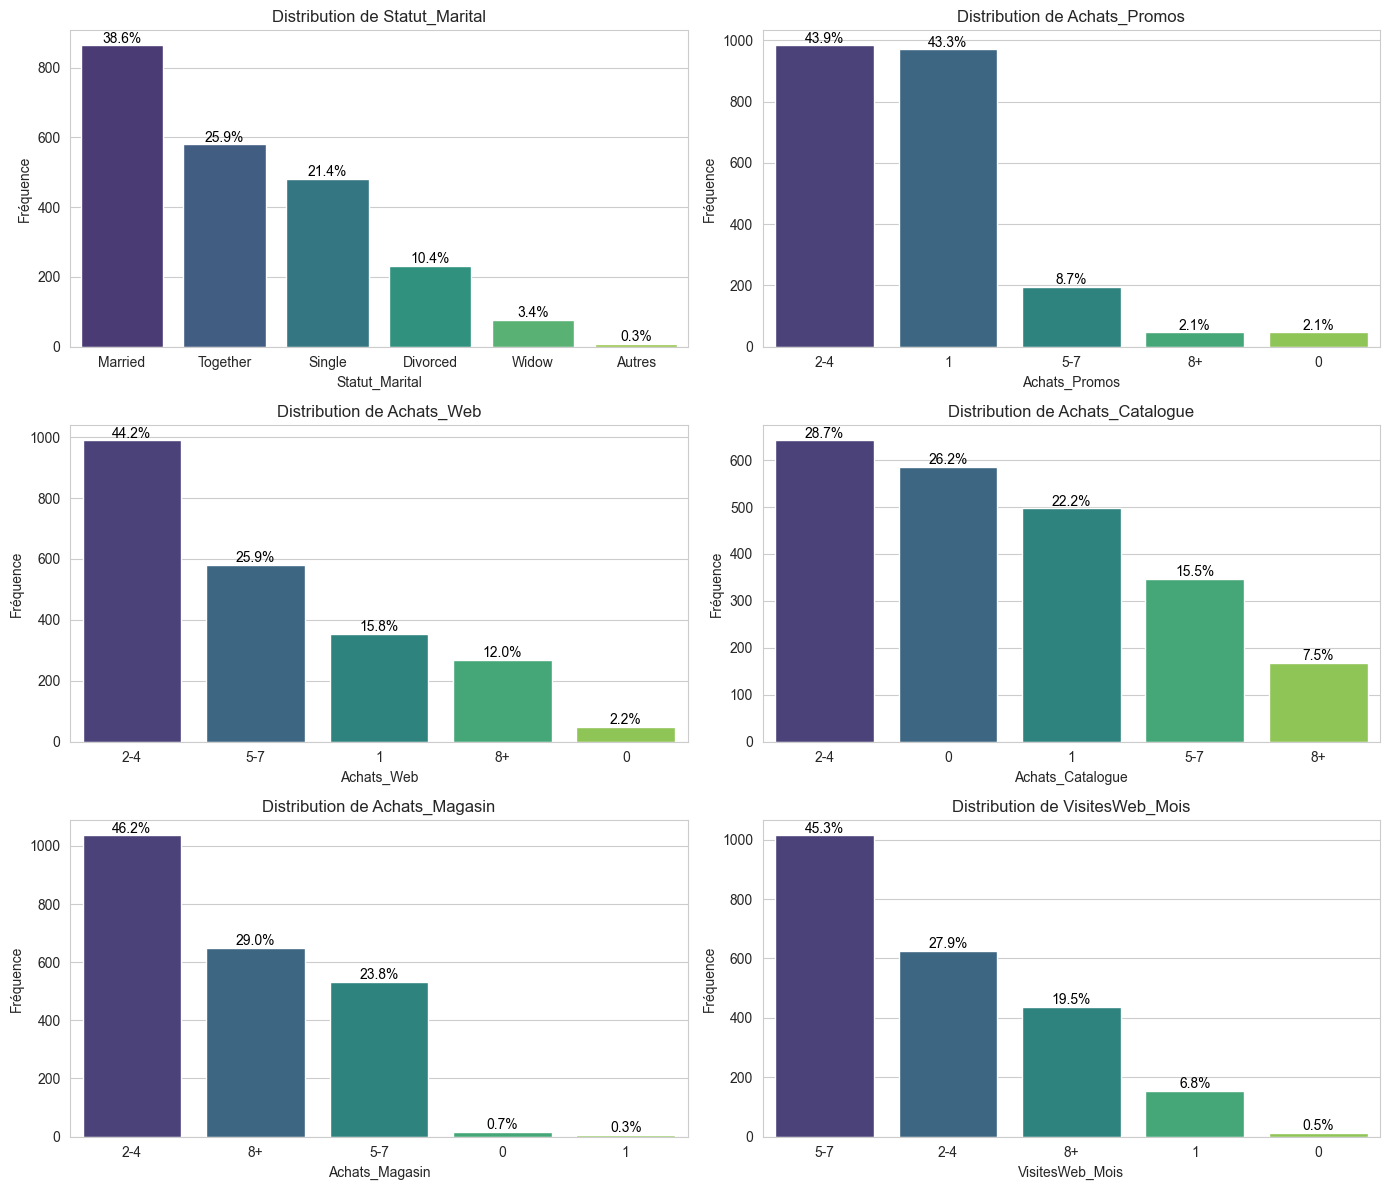

In [21]:
# Regroupement pour Statut Marital
Data_Campagne['Statut_Marital'] = Data_Campagne['Statut_Marital'].replace(['Alone', 'Absurd', 'YOLO'], 'Autres')

# Fonction de regroupement pour les achats et les visites web
def regroup_achats_visites(x):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    elif x in [2, 3, 4]:
        return '2-4'
    elif x in [5, 6, 7]:
        return '5-7'
    else:
        return '8+'
# Application du regroupement aux colonnes d'achats et de visites web
for col in ['Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']:
    Data_Campagne[col] = Data_Campagne[col].apply(regroup_achats_visites)


# Visualisation des distributions après regroupement
import seaborn as sns
import matplotlib.pyplot as plt

# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile
# Liste des colonnes à visualiser
    colonnes = ['Statut_Marital', 'Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']

    # Parcours des colonnes pour créer des histogrammes
    for ax, col in zip(axes, colonnes):
        total = Data_Campagne[col].notnull().sum()  # Total pour le calcul des pourcentages
        order = Data_Campagne[col].value_counts().index  # Ordre basé sur la fréquence
        countplot = sns.countplot(x=col, data=Data_Campagne, ax=ax, palette='viridis', order=order)
        ax.set_title(f'Distribution de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Fréquence')
        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

## Discrétisation de la Récence des Achats

Nous utiliserons les quartiles pour créer des intervalles représentant des périodes différentes depuis le dernier achat : 'Très Récent', 'Récent', 'Moyennement Ancien', et 'Ancien'.
Cette segmentation permettra d'identifier les clients selon la fréquence de leurs interactions avec l'entreprise et d'adapter les stratégies de marketing pour chaque groupe.

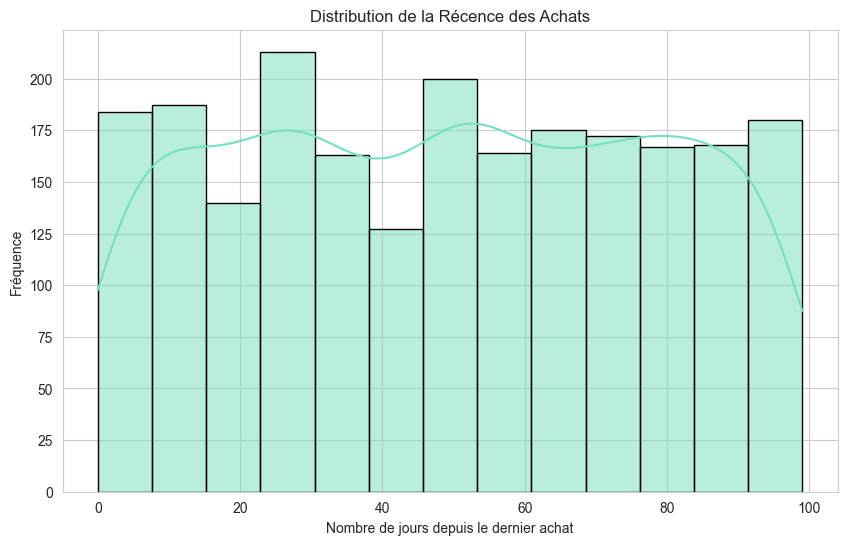

,count,mean,std,min,25%,50%,75%,max
Recence_Achat,2240.0,49.11,28.96,0.0,24.0,49.0,74.0,99.0


In [22]:
# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création de l'histogramme pour 'Recence_Achat'
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(Data_Campagne['Recence_Achat'], kde=True, color='#75DFC1', edgecolor='black')
    ax.set_title('Distribution de la Récence des Achats')
    ax.set_xlabel('Nombre de jours depuis le dernier achat')
    ax.set_ylabel('Fréquence')
    plt.show()

    # Calcul des statistiques descriptives pour 'Revenu'
stats_desc_Recence_Achat = Data_Campagne["Recence_Achat"].describe().round(2)

# Convertir en DataFrame pour pouvoir transposer
stats_desc_Recence_Achat_df = pd.DataFrame(stats_desc_Recence_Achat)

# Transposition du tableau pour une meilleure présentation
stats_desc_Recence_Achat_transposed = stats_desc_Recence_Achat_df.T

# Affichage du tableau transposé
display(stats_desc_Recence_Achat_transposed)

## Discrétisation de la Récence des Achats

Très Récent : 0 à 24 jours depuis le dernier achat.
Récent : 25 à 49 jours depuis le dernier achat.
Moyennement Ancien : 50 à 74 jours depuis le dernier achat.
Ancien : Plus de 74 jours depuis le dernier achat.

C:\Users\user\AppData\Local\Temp\ipykernel_17248\3018227853.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Categorie_Recence_Achat', data=Data_Campagne, palette='viridis', order=['Très Récent', 'Récent', 'Moyennement Ancien', 'Ancien'])


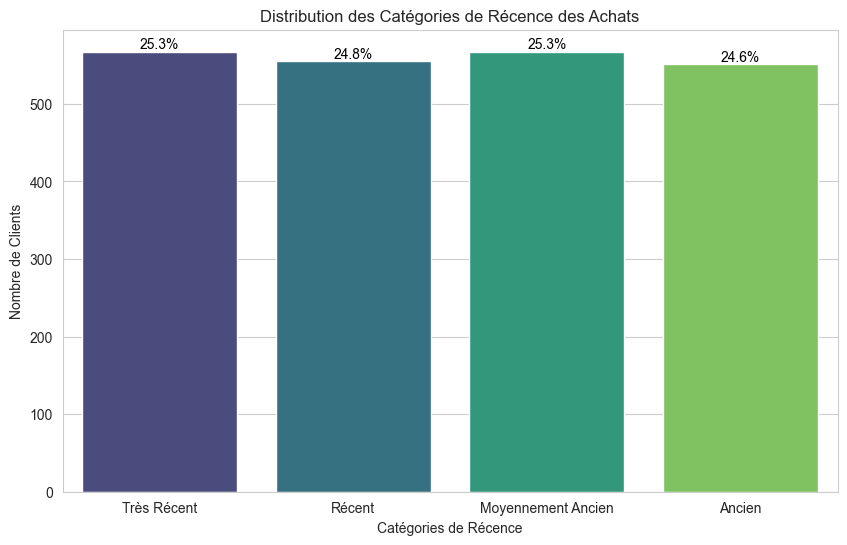

In [23]:
def discretize_recency(value, quartiles):
    if value <= quartiles[0.25]:
        return "Très Récent"
    elif value <= quartiles[0.50]:
        return "Récent"
    elif value <= quartiles[0.75]:
        return "Moyennement Ancien"
    else:
        return "Ancien"
    # Calcul des quartiles pour 'Recence_Achat'
quartiles_recency = Data_Campagne['Recence_Achat'].quantile([0.25, 0.50, 0.75])

# Application de la discrétisation
Data_Campagne['Categorie_Recence_Achat'] = Data_Campagne['Recence_Achat'].apply(lambda x: discretize_recency(x, quartiles_recency))

# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création de l'histogramme pour 'Categorie_Recence_Achat'
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='Categorie_Recence_Achat', data=Data_Campagne, palette='viridis', order=['Très Récent', 'Récent', 'Moyennement Ancien', 'Ancien'])
    ax.set_title('Distribution des Catégories de Récence des Achats')
    ax.set_xlabel('Catégories de Récence')
    ax.set_ylabel('Nombre de Clients')
# Calcul du total pour les pourcentages
    total = len(Data_Campagne['Categorie_Recence_Achat'])

    # Ajout des pourcentages sur les barres
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    plt.show()

## Nettoyage de la Base de Données

Colonnes Supprimées : Les variables initiales telles que 'Revenu', 'Age', 'Annee_Naissance', 'Date_Inscription', diverses catégories de dépenses, ainsi que 'Recence_Achat' ont été retirées. La raison principale est que ces variables ont déjà été discrétisées ou transformées, et leurs versions originales ne sont plus nécessaires.
Conservation des Données Traitées : Seules les versions discrétisées ou transformées de ces variables sont conservées pour garantir que notre analyse se base sur des informations pertinentes et simplifiées.

In [24]:
col_drop = ["Identifiant","Revenu", "Age", "Annee_Naissance", "Date_Inscription", 'Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes', 'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or', 'Cout_Contact', 'Revenu_Z', 'Recence_Achat']
Data_Campagne_clean = Data_Campagne.drop(col_drop, axis=1)

# Analyse Bivariée

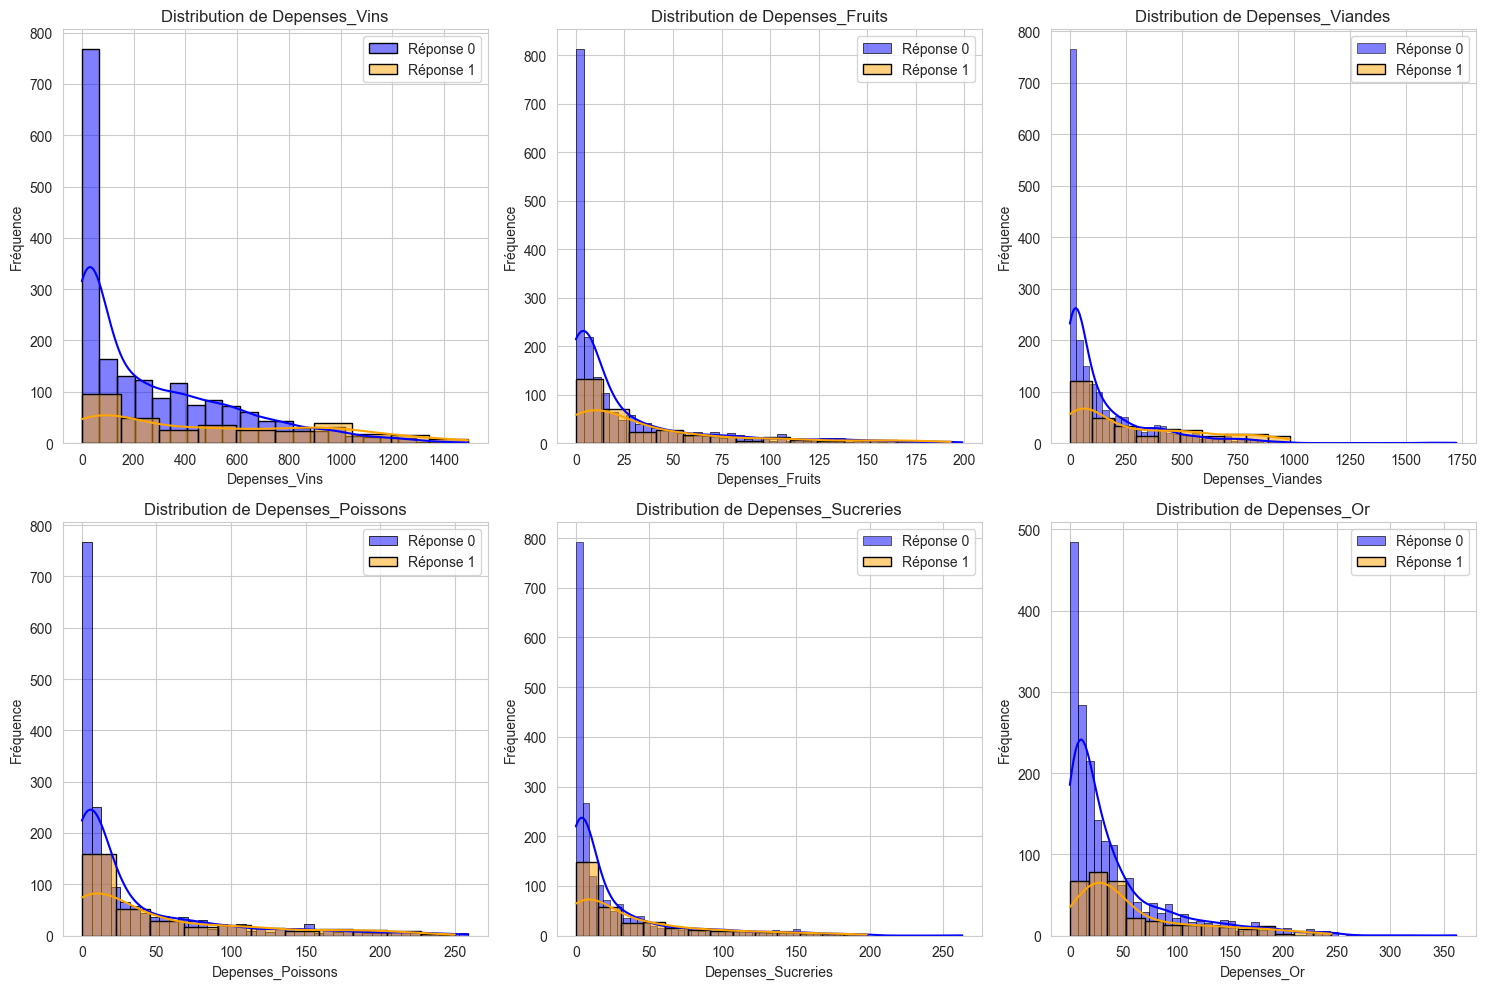

In [25]:
with sns.axes_style("whitegrid"):
    # Définition des variables à visualiser
    depenses_variables = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes',
                          'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or']

    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Aplatir le tableau des axes pour un accès facile
    axes = axes.flatten()

    # Parcours des variables pour créer des histogrammes et afficher la statistique descriptive
    for i, var in enumerate(depenses_variables):
        ax = axes[i]
        
        # Tracer les histogrammes pour la modalité 0 (Réponse == 0) en bleu
        sns.histplot(Data_Campagne[Data_Campagne['Reponse'] == 0][var], kde=True, ax=ax, color='blue', edgecolor='black', label='Réponse 0')

        # Tracer les histogrammes pour la modalité 1 (Réponse == 1) en orange
        sns.histplot(Data_Campagne[Data_Campagne['Reponse'] == 1][var], kde=True, ax=ax, color='orange', edgecolor='black', label='Réponse 1')
        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Fréquence')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

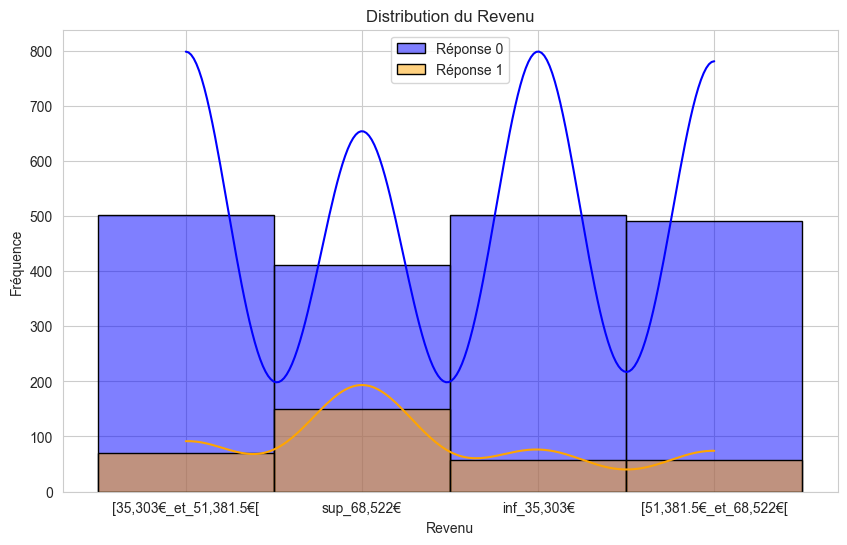

In [26]:
with sns.axes_style("whitegrid"):
    # Création d'un histogramme pour la variable 'Revenu'
    plt.figure(figsize=(10, 6))
    
    # Tracer l'histogramme pour la modalité 0 (Réponse == 0) en bleu
    sns.histplot(Data_Campagne_clean[Data_Campagne_clean['Reponse'] == 0]['Categorie_Revenu'], kde=True, color='blue', edgecolor='black', label='Réponse 0')

    # Tracer l'histogramme pour la modalité 1 (Réponse == 1) en orange
    sns.histplot(Data_Campagne_clean[Data_Campagne_clean['Reponse'] == 1]['Categorie_Revenu'], kde=True, color='orange', edgecolor='black', label='Réponse 1')

    plt.title('Distribution du Revenu')
    plt.xlabel('Revenu')
    plt.ylabel('Fréquence')

    plt.legend()
    plt.show()

In [27]:
Data_Campagne.groupby("Achats_Promos")["Reponse"].value_counts(normalize=True)

Achats_Promos  Reponse
0              0          0.652174
               1          0.347826
1              0          0.835052
               1          0.164948
2-4            0          0.886063
               1          0.113937
5-7            0          0.815385
               1          0.184615
8+             0          0.782609
               1          0.217391
Name: proportion, dtype: float64

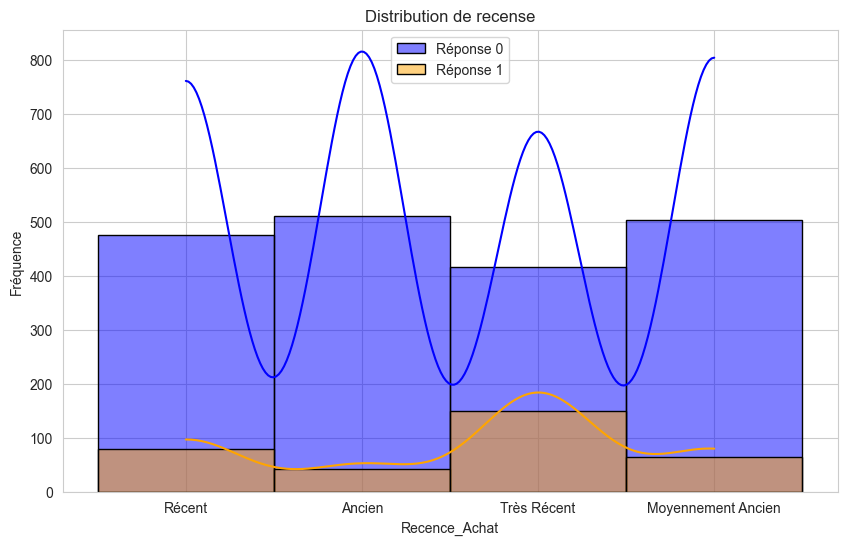

In [28]:
with sns.axes_style("whitegrid"):
    # Création d'un histogramme pour la variable 'Revenu'
    plt.figure(figsize=(10, 6))
    
    # Tracer l'histogramme pour la modalité 0 (Réponse == 0) en bleu
    sns.histplot(Data_Campagne_clean[Data_Campagne_clean['Reponse'] == 0]['Categorie_Recence_Achat'], kde=True, color='blue', edgecolor='black', label='Réponse 0')
# Tracer l'histogramme pour la modalité 1 (Réponse == 1) en orange
    sns.histplot(Data_Campagne_clean[Data_Campagne_clean['Reponse'] == 1]['Categorie_Recence_Achat'], kde=True, color='orange', edgecolor='black', label='Réponse 1')

    plt.title('Distribution de recense')
    plt.xlabel('Recence_Achat')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.show()

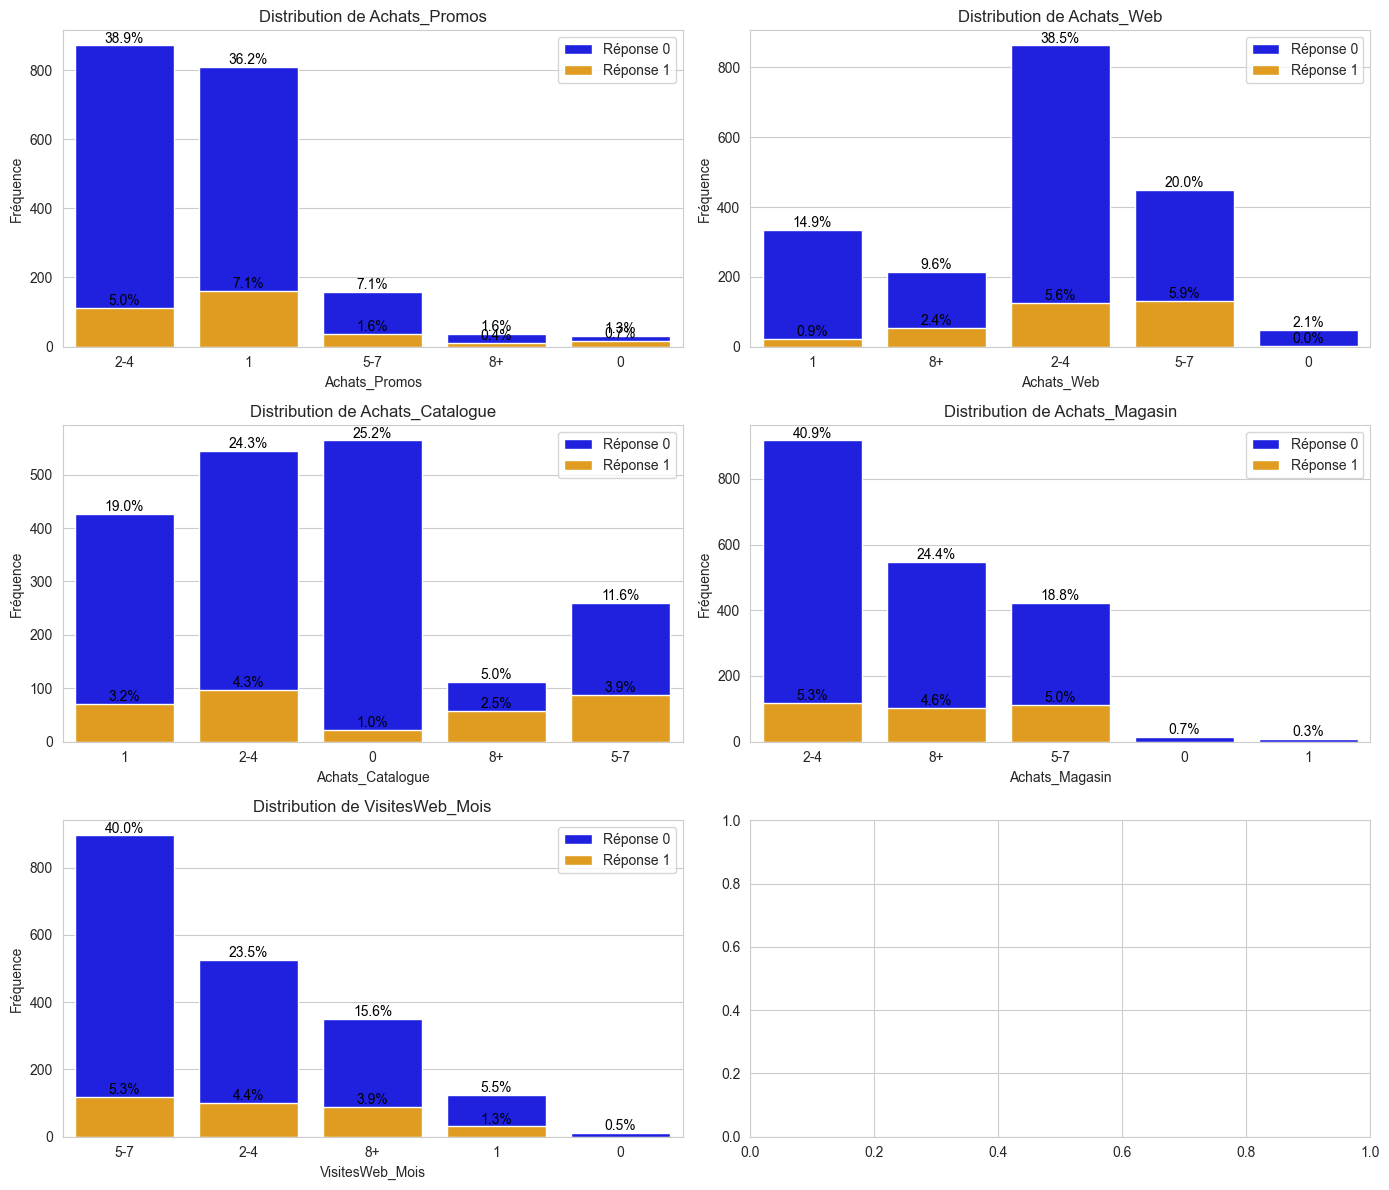

In [29]:
with sns.axes_style("whitegrid"):
    # Les noms de variables en français
    variables = ['Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']

    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile
    # Parcours des variables pour créer des histogrammes
    for ax, var in zip(axes, variables):
        total = Data_Campagne[var].notnull().sum()  # Total pour le calcul des pourcentages
        
        # Tracer les countplots pour la modalité 0 (Réponse == 0) en bleu
        sns.countplot(x=var, data=Data_Campagne_clean[Data_Campagne_clean['Reponse'] == 0], ax=ax, color='blue', label='Réponse 0')
        
        # Tracer les countplots pour la modalité 1 (Réponse == 1) en orange
        sns.countplot(x=var, data=Data_Campagne_clean[Data_Campagne_clean['Reponse'] == 1], ax=ax, color='orange', label='Réponse 1')
        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Fréquence')
        
        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
            plt.tight_layout()
    plt.show()

# Modélisation et Exploration des Données


Nous explorerons différents types de modèles pour trouver celui qui offre la meilleure performance.
Les techniques incluent la régression logistique, les arbres de décision, les forêts aléatoires, et potentiellement des modèles plus complexes comme le boosting et les réseaux de neurones.
La validation croisée sera utilisée pour assurer que nos modèles sont robustes et généralisables à de nouvelles données.
Nous accorderons une attention particulière à l'interprétabilité des modèles pour que les insights générés puissent être facilement compris et appliqués par les équipes marketing.

In [30]:
Data_Campagne_clean.head()

,Niveau_Education,Statut_Marital,Nb_Enfants,Nb_Adolescents,Achats_Promos,Achats_Web,Achats_Catalogue,Achats_Magasin,VisitesWeb_Mois,Campagne3_Acceptee,...,Categorie_Revenu,Categorie_Depenses_Vins,Categorie_Depenses_Fruits,Categorie_Depenses_Viandes,Categorie_Depenses_Poissons,Categorie_Depenses_Sucreries,Categorie_Depenses_Or,Anciennete,Categorie_Age,Categorie_Recence_Achat
0,Graduation,Single,0,0,2-4,8+,8+,2-4,5-7,0,...,"[51,381.5€_et_68,522€[",sup_504.25€,sup_33.0€,sup_232.0€,sup_50.0€,sup_33.0€,sup_56.0€,7,sup_60_ans,Moyennement Ancien
1,Graduation,Single,1,1,2-4,1,1,2-4,5-7,0,...,"[35,303€_et_51,381.5€[",inf_23.75€,inf_1.0€,inf_16.0€,inf_3.0€,inf_1.0€,inf_9.0€,5,sup_60_ans,Récent
2,Graduation,Together,0,0,1,8+,2-4,8+,2-4,0,...,"sup_68,522€",[173.5€_et_504.25€[,sup_33.0€,[67.0€_et_232.0€[,sup_50.0€,[8.0€_et_33.0€[,[24.0€_et_56.0€[,6,[_49_et_60_ans],Récent
3,Graduation,Together,1,0,2-4,2-4,0,2-4,5-7,0,...,"inf_35,303€",inf_23.75€,[1.0€_et_8.0€[,[16.0€_et_67.0€[,[3.0€_et_12.0€[,[1.0€_et_8.0€[,inf_9.0€,5,inf_42_ans,Récent
4,PhD,Married,1,0,5-7,5-7,2-4,5-7,5-7,0,...,"[51,381.5€_et_68,522€[",[23.75€_et_173.5€[,sup_33.0€,[67.0€_et_232.0€[,[12.0€_et_50.0€[,[8.0€_et_33.0€[,[9.0€_et_24.0€[,5,inf_42_ans,Ancien


## Transformation des Variables Catégorielles via le Codage à Chaud (One-Hot Encoding)

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Selecting only object type columns (qualitative variables)
qualitative_columns = Data_Campagne_clean.select_dtypes(include=['object']).columns

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(Data_Campagne_clean[qualitative_columns])

# Creating a DataFrame with the encoded data
encoded_column_names = encoder.get_feature_names_out(qualitative_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)

# Concatenating the encoded data with the original data, dropping original qualitative columns
transformed_data = pd.concat([Data_Campagne_clean.drop(qualitative_columns, axis=1), encoded_df], axis=1)

# Displaying the transformed data
transformed_data.head()


,Nb_Enfants,Nb_Adolescents,Campagne3_Acceptee,Campagne4_Acceptee,Campagne5_Acceptee,Campagne1_Acceptee,Campagne2_Acceptee,Plainte,Reponse,Anciennete,...,Categorie_Depenses_Or_inf_9.0€,Categorie_Depenses_Or_sup_56.0€,Categorie_Age_[42_et_49_ans],Categorie_Age_[_49_et_60_ans],Categorie_Age_inf_42_ans,Categorie_Age_sup_60_ans,Categorie_Recence_Achat_Ancien,Categorie_Recence_Achat_Moyennement Ancien,Categorie_Recence_Achat_Récent,Categorie_Recence_Achat_Très Récent
0,0,0,0,0,0,0,0,0,1,7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,0,0,0,0,0,0,0,5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,0,0,0,0,0,0,5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,0,0,0,0,0,5,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Analyse de Corrélation avec la Variable Cible 'Reponse'

C:\Users\user\AppData\Local\Temp\ipykernel_17248\3651065319.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlated_columns.values, y=top_correlated_columns.index, palette="viridis")


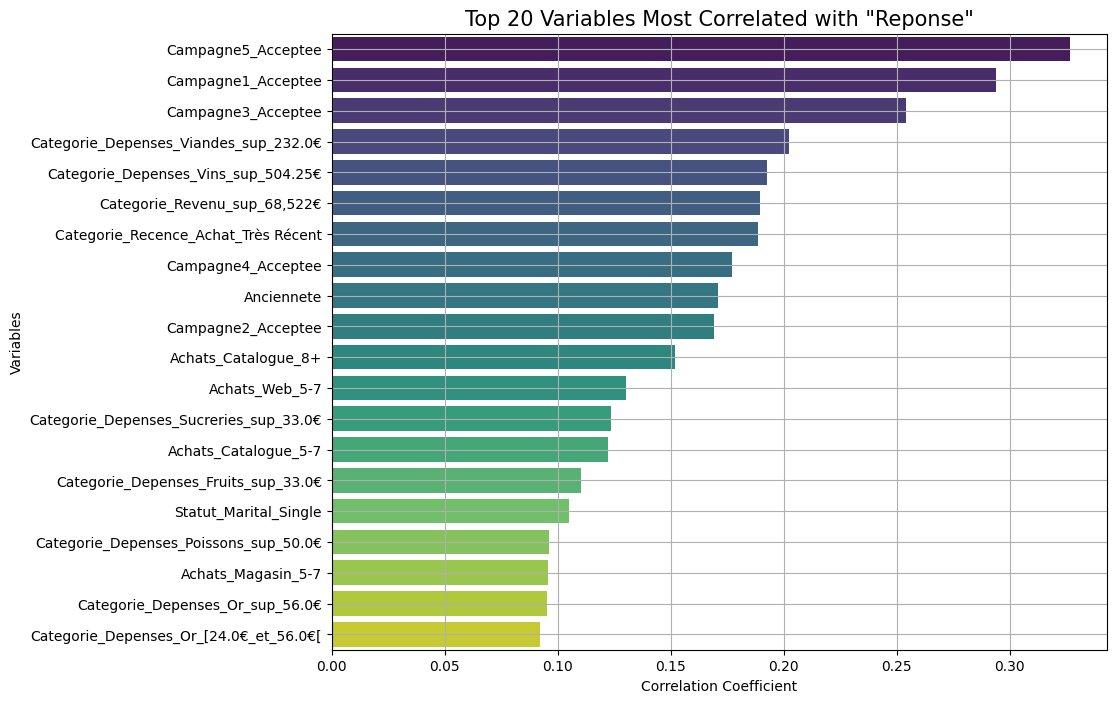

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the correlation with the target variable 'Reponse'
correlation = transformed_data.corr()['Reponse'].sort_values(ascending=False)

# Selecting the top 20 most correlated variables (excluding 'Reponse' itself)
top_correlated_columns = correlation[1:21]  # Skipping the first one as it will be 'Reponse' itself

# Creating a bar plot for visualization
plt.figure(figsize=(10, 8))
sns.barplot(x=top_correlated_columns.values, y=top_correlated_columns.index, palette="viridis")
plt.title('Top 20 Variables Most Correlated with "Reponse"', fontsize=15)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)
plt.show()

### Division du Jeu de Données en Ensembles d'Entraînement et de Test

Stratification : La stratification garantit que la proportion de la variable cible 'Reponse' est similaire dans les ensembles d'entraînement et de test. Cela est particulièrement important si la variable cible est déséquilibrée (par exemple, si une classe est beaucoup plus fréquente que l'autre).
Taille des Ensembles : Généralement, le jeu de données est divisé en 70-80% pour l'entraînement et 20-30% pour le test, mais cela peut varier en fonction de la taille et de la spécificité des données.

In [35]:
from sklearn.model_selection import train_test_split

# Supposons que 'transformed_data' soit votre jeu de données et 'Reponse' la variable cible
X = transformed_data.drop('Reponse', axis=1)  # Caractéristiques
y = transformed_data['Reponse']               # Cible

# Division des données en ensembles d'entraînement et de test, avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Pour vérifier, vous pouvez regarder les proportions de 'Reponse' dans les ensembles d'entraînement et de test
train_proportion = y_train.value_counts(normalize=True)
test_proportion = y_test.value_counts(normalize=True)
print(train_proportion)
print(test_proportion)

Reponse
0    0.850765
1    0.149235
Name: proportion, dtype: float64
Reponse
0    0.85119
1    0.14881
Name: proportion, dtype: float64


## Introduction à la Régression Logistique pour l'Analyse des Campagnes Marketing

La régression logistique est un outil statistique puissant utilisé pour modéliser la probabilité d'un événement binaire ou catégoriel. Dans le cadre de notre projet, ce modèle sera utilisé pour prédire la probabilité de réponse d'un client à une campagne marketing (réponse ou non-réponse).

Contexte du Modèle : La régression logistique est particulièrement adaptée à notre analyse car elle permet de traiter des problèmes de classification binaire, où l'objectif est de prédire une variable dépendante binaire (dans notre cas, la 'Reponse' du client).

0.8883928571428571
[[556  16]
 [ 59  41]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       572
           1       0.72      0.41      0.52       100

    accuracy                           0.89       672
   macro avg       0.81      0.69      0.73       672
weighted avg       0.88      0.89      0.88       672



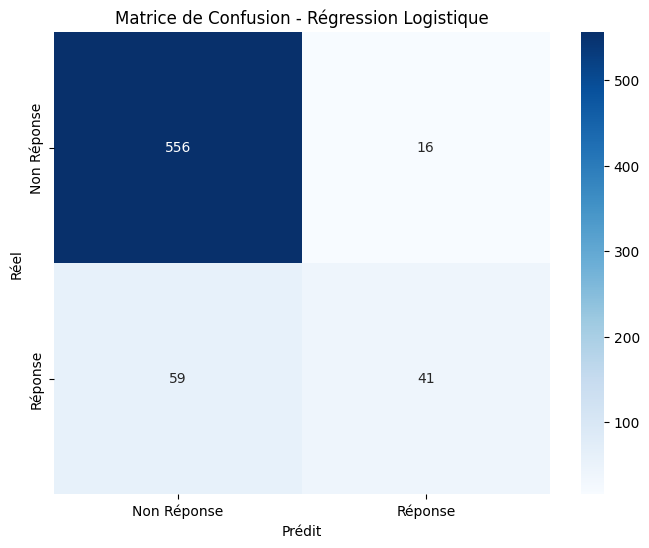

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Création du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle avec l'ensemble d'entraînement
logistic_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = logistic_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

# Création d'un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Régression Logistique')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester pour l'optimisation
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valeurs de régularisation
    'penalty': ['l1', 'l2'],  # Types de pénalité (l1 = lasso, l2 = ridge)
    'solver': ['liblinear', 'saga']  # Solveurs compatibles avec les pénalités l1 et l2
}

# Création du modèle de régression logistique pour la recherche sur grille
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Recherche sur grille avec validation croisée
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraînement avec l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Meilleur modèle et paramètres
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

best_model, best_params

(LogisticRegression(C=1, max_iter=1000, random_state=42, solver='saga'),
 {'C': 1, 'penalty': 'l2', 'solver': 'saga'})

In [38]:
# Création du modèle de régression logistique avec les meilleurs paramètres
final_model = LogisticRegression(C=1, penalty='l2', solver='saga', max_iter=1000, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
final_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_final = final_model.predict(X_test)

# Évaluation du modèle final
final_accuracy = accuracy_score(y_test, y_pred_final)
final_conf_matrix = confusion_matrix(y_test, y_pred_final)
final_class_report = classification_report(y_test, y_pred_final)

print(final_accuracy)
print(final_conf_matrix)
print(final_class_report)

0.8898809523809523
[[557  15]
 [ 59  41]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       572
           1       0.73      0.41      0.53       100

    accuracy                           0.89       672
   macro avg       0.82      0.69      0.73       672
weighted avg       0.88      0.89      0.88       672



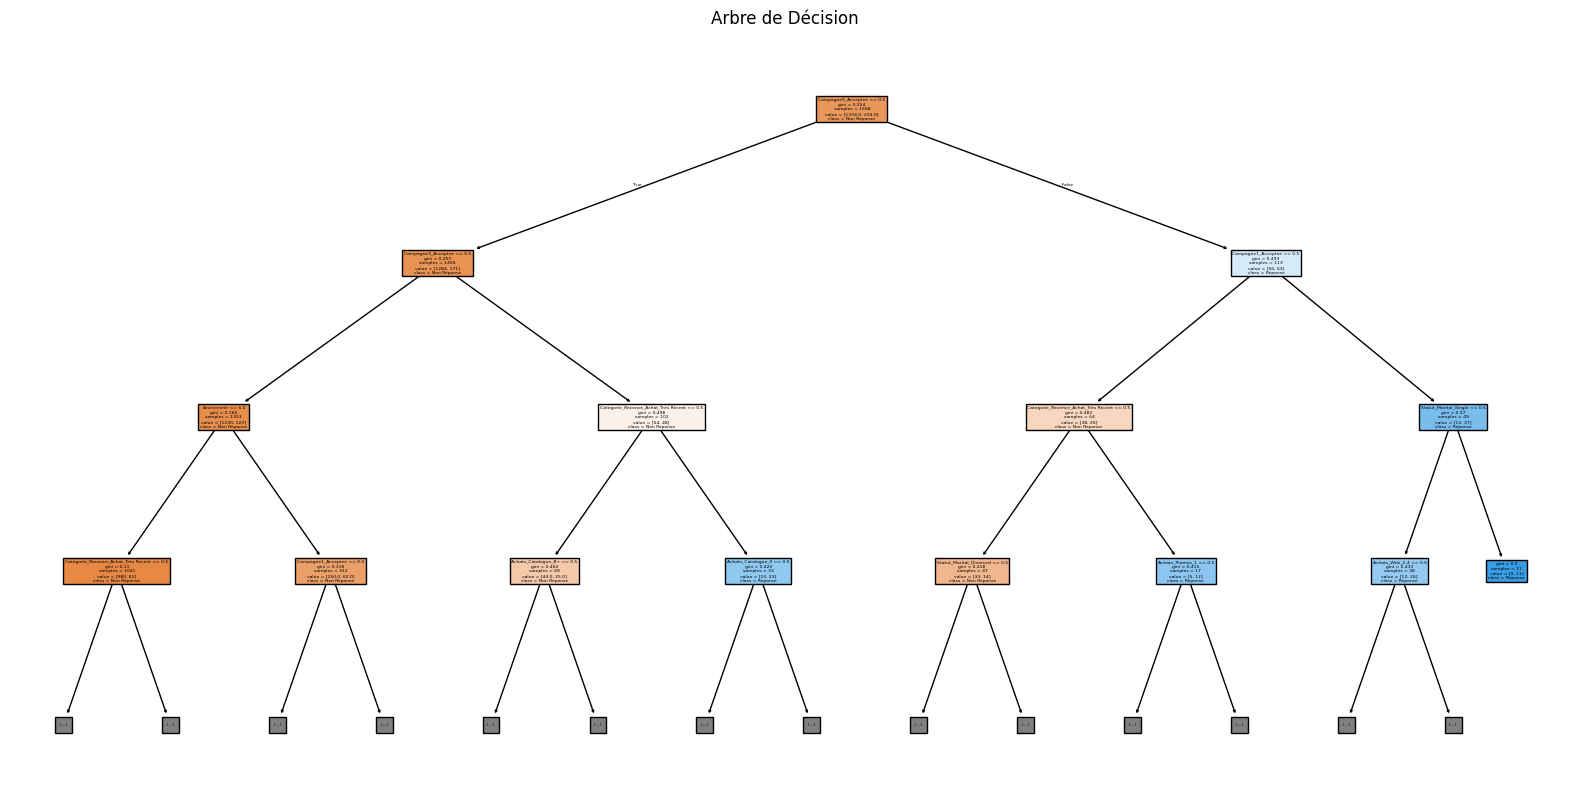

0.8601190476190477
[[530  42]
 [ 52  48]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       572
           1       0.53      0.48      0.51       100

    accuracy                           0.86       672
   macro avg       0.72      0.70      0.71       672
weighted avg       0.85      0.86      0.86       672



In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Création du modèle d'arbre de décision
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
decision_tree_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_dt = decision_tree_model.predict(X_test)

# Évaluation du modèle
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_class_report = classification_report(y_test, y_pred_dt)

# Affichage de l'arbre de décision
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['Non Réponse', 'Réponse'], max_depth=3)
plt.title("Arbre de Décision")
plt.show()
print(dt_accuracy) 
print(dt_conf_matrix)
print(dt_class_report)

<Figure size 800x600 with 0 Axes>

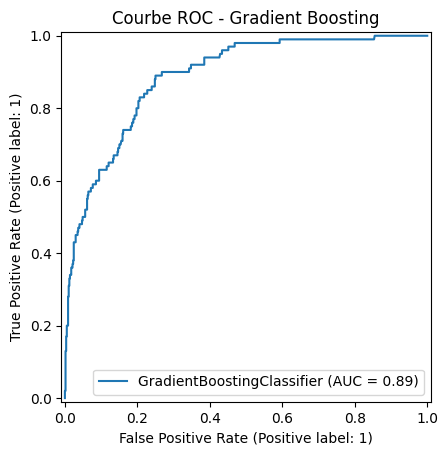

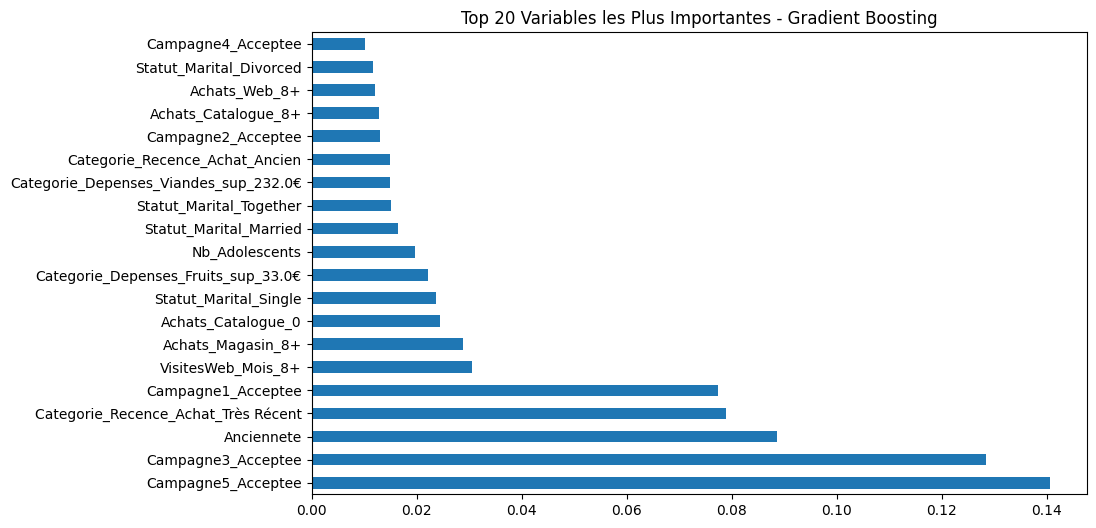

0.8869047619047619


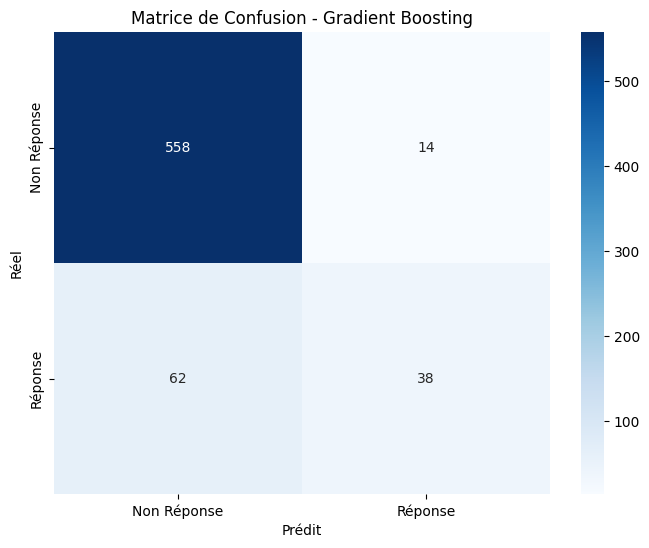

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       572
           1       0.73      0.38      0.50       100

    accuracy                           0.89       672
   macro avg       0.82      0.68      0.72       672
weighted avg       0.87      0.89      0.87       672



In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Création du modèle Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle
gb_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test)

# Évaluation du modèle
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)
gb_class_report = classification_report(y_test, y_pred_gb)

# Importance des variables
feature_importances = gb_model.feature_importances_

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(gb_model, X_test, y_test)
plt.title("Courbe ROC - Gradient Boosting")
plt.show()


# Affichage des 10 variables les plus importantes
important_features = pd.Series(feature_importances, index=X.columns).nlargest(20)
plt.figure(figsize=(10, 6))
important_features.plot(kind='barh')
plt.title("Top 20 Variables les Plus Importantes - Gradient Boosting")
plt.show()

print(gb_accuracy)
# Amélioration de la visualisation de la matrice de confusion pour le modèle Gradient Boosting

# Création d'un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Gradient Boosting')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

print(gb_class_report)


In [41]:
slect_col_corr = top_correlated_columns.index.tolist()

0.8779761904761905
[[558  14]
 [ 68  32]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       572
           1       0.70      0.32      0.44       100

    accuracy                           0.88       672
   macro avg       0.79      0.65      0.68       672
weighted avg       0.86      0.88      0.86       672



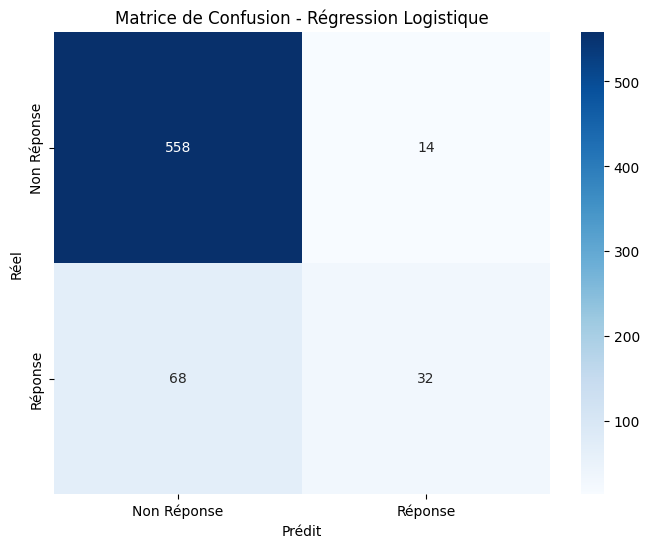

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Création du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle avec l'ensemble d'entraînement
logistic_model.fit(X_train[slect_col_corr], y_train)

# Prédiction sur l'ensemble de test
y_pred = logistic_model.predict(X_test[slect_col_corr])

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

# Création d'un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Régression Logistique')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


Caractéristiques sélectionnées :
Index(['Campagne3_Acceptee', 'Campagne5_Acceptee', 'Campagne1_Acceptee',
       'Campagne2_Acceptee', 'Anciennete', 'Niveau_Education_Basic',
       'Statut_Marital_Married', 'Statut_Marital_Together',
       'Achats_Catalogue_0', 'Categorie_Recence_Achat_Très Récent'],
      dtype='object')


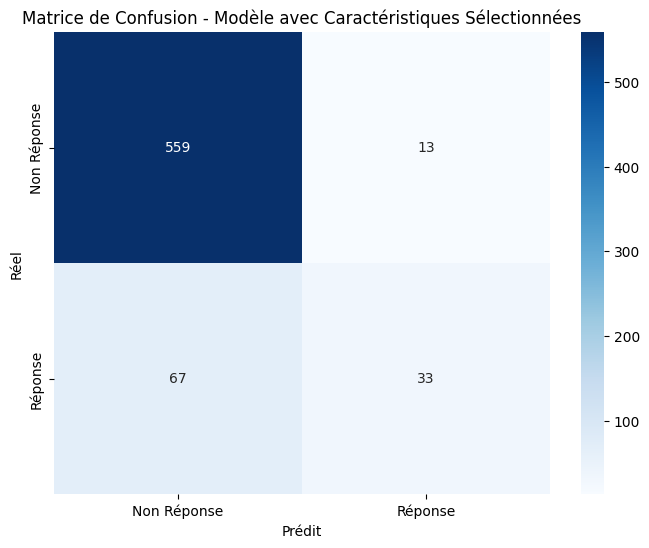

Précision du modèle :  0.8809523809523809
Rapport de classification :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       572
           1       0.72      0.33      0.45       100

    accuracy                           0.88       672
   macro avg       0.81      0.65      0.69       672
weighted avg       0.87      0.88      0.86       672



In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Création du modèle de sélection de caractéristiques
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=10, step=1)

# Entraînement du sélecteur
selector = selector.fit(X_train, y_train)

# Sélection des caractéristiques
selected_features = X_train.columns[selector.support_]

# Affichage des caractéristiques sélectionnées
print("Caractéristiques sélectionnées :")
print(selected_features)


# Création d'un nouveau modèle avec les caractéristiques sélectionnées
model = LogisticRegression(max_iter=1000)
model.fit(X_train[selected_features], y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test[selected_features])

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Modèle avec Caractéristiques Sélectionnées')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

print("Précision du modèle : ", accuracy)
print("Rapport de classification :\n", class_report)

0.8244047619047619
[[481  91]
 [ 27  73]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       572
           1       0.45      0.73      0.55       100

    accuracy                           0.82       672
   macro avg       0.70      0.79      0.72       672
weighted avg       0.87      0.82      0.84       672



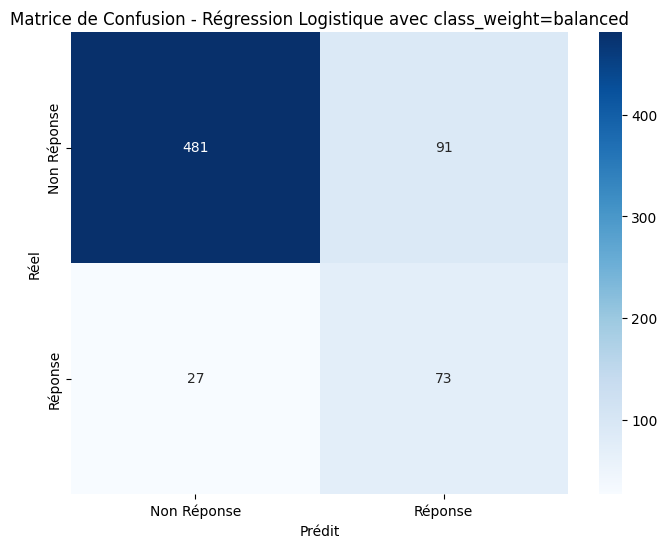

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Création du modèle de régression logistique avec class_weight='balanced'
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Entraînement du modèle avec l'ensemble d'entraînement
logistic_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = logistic_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

# Création d'un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Régression Logistique avec class_weight=balanced')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

Précision du modèle de forêt aléatoire : 0.8824404761904762
Matrice de confusion :
 [[567   5]
 [ 74  26]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       572
           1       0.84      0.26      0.40       100

    accuracy                           0.88       672
   macro avg       0.86      0.63      0.67       672
weighted avg       0.88      0.88      0.85       672



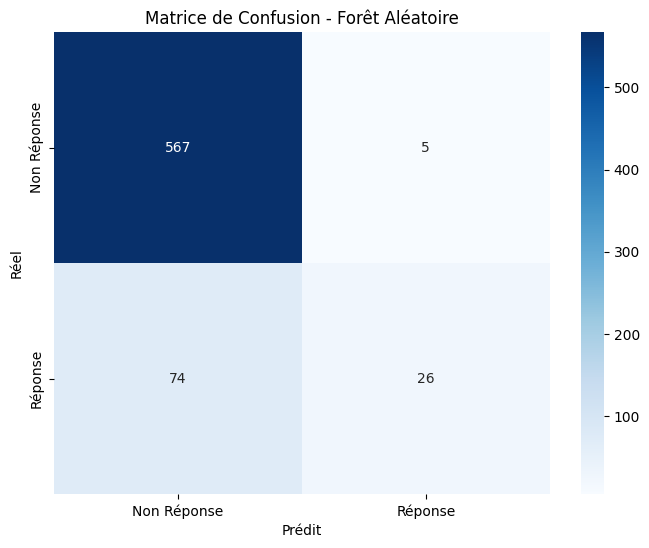

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Création du modèle de forêt aléatoire
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entraînement du modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

# Affichage des résultats
print("Précision du modèle de forêt aléatoire :", rf_accuracy)
print("Matrice de confusion :\n", rf_conf_matrix)
print("Rapport de classification :\n", rf_class_report)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Forêt Aléatoire')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()